# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

By conducting exploratory data analysis, data processing and modeling, the objective of this project is to build the best regression model, using the Ames Housing Dataset, to predict the price of a house at sale and will be scored by the Root Mean Squared Error.
<br>
<br>
The 2 data sets provided are a train set containing all the information in Ames Housing Project which will be used to build the model for prediction and a test set which has all the columns found in the train set except for the SalePrice column which we will be predicting. Excluding SalePrice and Id, the dataset contains 2051 observations and 79 features. 

- [Problem Statement](#problem-statement)
- [Data dictionary](#data-dictionary)
- [EDA](#eda)
  * [Import libraries and load datasets](#import-libraries-and-load-datasets)
  * [Check for null](#check-for-null)
- [Data Cleaning](#data-cleaning)
  * [Summary of fixing null values](#summary-of-fixing-null-values)
  * [Check categorial features](#check-categorial-features)
  * [Check numerical features](#check-numerical-features)
- [Exploratory Visualizations](#exploratory-visualizations)
  * [Scatterplot](#scatterplot)
  * [Removing outliers](#removing-outliers)
  * [Histograms](#histograms)
  * [Boxplots](#boxplots)
  * [Feature engineering](#feature-engineering)
  * [Heatmap](#heatmap)
- [Pre-processing](#pre-processing)
- [Modeling](#modeling)
  * [Linear regression](#linear-regression)
  * [Kaggle score:](#kaggle-score-)
  * [Ridge regression](#ridge-regression)
  * [Lasso regression](#lasso-regression)
  * [Model comparison](#model-comparison)
- [Inferential Visualizations](#inferential-visualizations)
- [Business Recommendations](#business-recommendations)

<small><i><a href='http://ecotrust-canada.github.io/markdown-toc/'>Table of contents generated with markdown-toc</a></i></small>


### Data dictionary
https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data

## EDA

### Import libraries and load datasets

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load datasets
traindf = pd.read_csv('./datasets/train.csv')
testdf = pd.read_csv('./datasets/test.csv')

In [3]:
# Check loaded datasets
traindf.shape

(2051, 81)

In [4]:
testdf.shape

(879, 80)

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

#### Test dataset has one less column, SalePrice, which is what we want to predict so it makes sense.

### Check for null

In [7]:
# Columns with null
null = traindf.columns[traindf.isnull().any()]
null

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [8]:
# Null count in each columns
null_sum = traindf[null].isnull().sum()
null_sum.sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
dtype: int64

In [9]:
# Null count in percent sorted in descending order
null_percent = round((null_sum / 2051), 3)
null_percent.sort_values(ascending = False)

Pool QC           0.996
Misc Feature      0.968
Alley             0.932
Fence             0.805
Fireplace Qu      0.488
Lot Frontage      0.161
Garage Yr Blt     0.056
Garage Cond       0.056
Garage Qual       0.056
Garage Finish     0.056
Garage Type       0.055
Bsmt Exposure     0.028
Bsmt Cond         0.027
Bsmt Qual         0.027
BsmtFin Type 1    0.027
BsmtFin Type 2    0.027
Mas Vnr Area      0.011
Mas Vnr Type      0.011
Bsmt Half Bath    0.001
Bsmt Full Bath    0.001
Total Bsmt SF     0.000
Bsmt Unf SF       0.000
BsmtFin SF 2      0.000
Garage Cars       0.000
Garage Area       0.000
BsmtFin SF 1      0.000
dtype: float64

### 26 features with null values
1. Pool QC: pool quality
2. Misc Feature: miscellaneous feature not covered in other categories
3. Alley: type of alley access to property
4. Fence: fence quality
5. Fireplace Qu: fireplace quality
6. Lot Frontage: Linear feet of street connected to property
7. Garage Yr Blt: Year garage was built
8. Garage Cond: Garage condition
9. Garage Qual: Garage quality
10. Garage Finish: Interior finish of the garage
11. Garage Type: Garage location
12. Bsmt Exposure: Walkout or garden level basement walls
13. BsmtFin Type 2: Quality of second finished area (if present)
14. Bsmt Cond: General condition of the basement
15. Bsmt Qual: Height of the basement
16. BsmtFin Type 1: Quality of basement finished area
17. Mas Vnr Area: Masonry veneer area in square feet
18. Mas Vnr Type: Masonry veneer type
19. Bsmt Half Bath: Basement half bathrooms
20. Bsmt Full Bath: Basement full bathrooms
21. Total Bsmt SF: Total square feet of basement area
22. Bsmt Unf SF: Unfinished square feet of basement area
23. BsmtFin SF 2: Type 2 finished square feet
24. Garage Cars: Size of garage in car capacity
25. Garage Area: Size of garage in square feet
26. BsmtFin SF 1: Type 1 finished square feet

#### The 5 features of concern (high % of null) are
1. Pool QC
2. Misc feature
3. Alley
4. Fence
5. Fireplace Qu

#### 1 feature to note
- Lot Frontage

#### Additional features related to features above:
1. Pool Area (related to Pool QC): pool area in square feet
2. Misc Val (related to Misc feature): value of miscellaneous feature
3. Fireplaces (related to Fireplace Qu): Number of fireplaces

In [10]:
# Explore additional features further
traindf[['Pool Area', 'Misc Val', 'Fireplaces']].describe()

,Pool Area,Misc Val,Fireplaces
count,2051.000000,2051.000000,2051.000000
mean,2.397855,51.574354,0.590931
std,37.782570,573.393985,0.638516
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,800.000000,17000.000000,4.000000


In [11]:
traindf[traindf['Pool Area'] == 0].shape[0]

2042

In [12]:
traindf[traindf['Misc Val'] == 0].shape[0]

1986

In [13]:
traindf[traindf['Fireplaces'] == 0].shape[0]

1000

#### We find that the 3 additional features have '0' as value where their related features have 'null'.

We will drop
- Pool QC
- Pool Area
- Misc Feature
- Misc Val
- Alley
- Fence

<p>columns for the reason that there are simply too many null values in these columns to make any difference to the dataset. Fireplaces and Fireplace Qu will be kept because, as we can see, the null values in Fireplace Qu is an indication that there is no fireplace (as indicated in the corresponding '0' in Fireplaces column) in the house. </p>

In [14]:
# Dropping the columns
traindf.drop(['Pool QC', 'Pool Area', 'Misc Feature', 'Misc Val', 'Alley', 'Fence'], axis = 1, inplace = True)
testdf.drop(['Pool QC', 'Pool Area', 'Misc Feature', 'Misc Val', 'Alley', 'Fence'], axis = 1, inplace = True)

In [15]:
# Dropping Garage cars feature for its high colinearity with Garage Area
traindf.drop(['Garage Cars'], axis = 1, inplace = True)
testdf.drop(['Garage Cars'], axis = 1, inplace = True)

## Data Cleaning

### Summary of fixing null values

Using information from the data dictionary, we categorize our fixes into 3 categories
1. Fill with 'NA' because the null value simply means the absence of the feature and it is indicated with 'NA' for example null in Garage Cond means there is no garage, null in Bsmt Cond means there is no basement.
2. Fill with '0' for features with area for example Total Bsmt SF
3. Fill with 'None': Mas Vnr Type. We will fill the null in Mas Vnr type with 'None' as shown in the data dictionary.

In [16]:
# Fill with 'NA'
traindf['Fireplace Qu'] = traindf['Fireplace Qu'].fillna('NA')
traindf['Garage Yr Blt'] = traindf['Garage Yr Blt'].fillna('NA')
traindf['Garage Cond'] = traindf['Garage Cond'].fillna('NA')
traindf['Garage Qual'] = traindf['Garage Qual'].fillna('NA')
traindf['Garage Finish'] = traindf['Garage Finish'].fillna('NA')
traindf['Garage Type'] = traindf['Garage Type'].fillna('NA')
traindf['Bsmt Exposure'] = traindf['Bsmt Exposure'].fillna('NA')
traindf['Bsmt Cond'] = traindf['Bsmt Cond'].fillna('NA')
traindf['Bsmt Qual'] = traindf['Bsmt Qual'].fillna('NA')
traindf['BsmtFin Type 1'] = traindf['BsmtFin Type 1'].fillna('NA')
traindf['BsmtFin Type 2'] = traindf['BsmtFin Type 2'].fillna('NA')
traindf['Bsmt Half Bath'] = traindf['Bsmt Half Bath'].fillna('NA')
traindf['Bsmt Full Bath'] = traindf['Bsmt Full Bath'].fillna('NA')
testdf['Fireplace Qu'] = testdf['Fireplace Qu'].fillna('NA')
testdf['Garage Yr Blt'] = testdf['Garage Yr Blt'].fillna('NA')
testdf['Garage Cond'] = testdf['Garage Cond'].fillna('NA')
testdf['Garage Qual'] = testdf['Garage Qual'].fillna('NA')
testdf['Garage Finish'] = testdf['Garage Finish'].fillna('NA')
testdf['Garage Type'] = testdf['Garage Type'].fillna('NA')
testdf['Bsmt Exposure'] = testdf['Bsmt Exposure'].fillna('NA')
testdf['Bsmt Cond'] = testdf['Bsmt Cond'].fillna('NA')
testdf['Bsmt Qual'] = testdf['Bsmt Qual'].fillna('NA')
testdf['BsmtFin Type 1'] = testdf['BsmtFin Type 1'].fillna('NA')
testdf['BsmtFin Type 2'] = testdf['BsmtFin Type 2'].fillna('NA')
testdf['Bsmt Half Bath'] = testdf['Bsmt Half Bath'].fillna('NA')
testdf['Bsmt Full Bath'] = testdf['Bsmt Full Bath'].fillna('NA')

In [17]:
# Fill with '0'
traindf['Lot Frontage'] = traindf['Lot Frontage'].fillna(0)
traindf['Mas Vnr Area'] = traindf['Mas Vnr Area'].fillna(0)
traindf['Total Bsmt SF'] = traindf['Total Bsmt SF'].fillna(0)
traindf['Bsmt Unf SF'] = traindf['Bsmt Unf SF'].fillna(0)
traindf['BsmtFin SF 2'] = traindf['BsmtFin SF 2'].fillna(0)
traindf['Garage Area'] = traindf['Garage Area'].fillna(0)
traindf['BsmtFin SF 1'] = traindf['BsmtFin SF 1'].fillna(0)
testdf['Lot Frontage'] = testdf['Lot Frontage'].fillna(0)
testdf['Mas Vnr Area'] = testdf['Mas Vnr Area'].fillna(0)
testdf['Total Bsmt SF'] = testdf['Total Bsmt SF'].fillna(0)
testdf['Bsmt Unf SF'] = testdf['Bsmt Unf SF'].fillna(0)
testdf['BsmtFin SF 2'] = testdf['BsmtFin SF 2'].fillna(0)
testdf['Garage Area'] = testdf['Garage Area'].fillna(0)
testdf['BsmtFin SF 1'] = testdf['BsmtFin SF 1'].fillna(0)

In [18]:
# Fill with 'None'
traindf['Mas Vnr Type'] = traindf['Mas Vnr Type'].fillna('None')
testdf['Mas Vnr Type'] = testdf['Mas Vnr Type'].fillna('None')

In [19]:
# Check for null
traindf.columns[traindf.isnull().any()]

Index([], dtype='object')

In [20]:
testdf.columns[testdf.isnull().any()]

Index(['Electrical'], dtype='object')

In [21]:
testdf[testdf['Electrical'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,...,TA,Y,100,0,0,0,0,5,2008,WD


#### Since this is the test dataset and there is only 1 null value, we will leave it for now.

### Check categorial features

In [22]:
# Check categorical features
objectdf = traindf.select_dtypes(include=['object'])
for column in objectdf.columns:
    print(column)
    print(objectdf[column].value_counts(dropna = False))
    print('\n')

MS Zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64


Street
Pave    2044
Grvl       7
Name: Street, dtype: int64


Lot Shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64


Land Contour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64


Utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64


Lot Config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64


Land Slope
Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64


Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV  

- We will drop features that have over 90% of values in the same category and they are Utilities, Street, Land Slope, Condition 2, Roof Matl, Heating, Central Air, Electrical, Bsmt Half Bath, Functional, Garage Qual, Garage Cond and Paved Drive.
- Note that Greens, GrnHill, Landmrk in Neighborhood are not in dictionary.
- Twnhs in Bldg Type is not in dictionary, assumed to be TwnhsI.
- Brk Cmn in Exterior 2nd should be BrkComm. We will fix this.

In [23]:
# Replacing 'Brk Cmn' in Exterior 2nd to 'BrkComm'
traindf['Exterior 2nd'] = traindf['Exterior 2nd'].map(lambda x: x.replace('Brk Cmn', 'BrkComm'))
testdf['Exterior 2nd'] = testdf['Exterior 2nd'].map(lambda x: x.replace('Brk Cmn', 'BrkComm'))

In [24]:
# Check replacement
traindf['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
BrkComm     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [25]:
testdf['Exterior 2nd'].value_counts()

VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CmentBd     36
Wd Shng     18
Stucco      17
BrkFace     13
AsbShng     10
BrkComm      5
ImStucc      4
CBlock       1
Other        1
PreCast      1
AsphShn      1
Name: Exterior 2nd, dtype: int64

In [26]:
# Dropping features that have over 90% of values in the same category 
traindf.drop(['Utilities', 'Street', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Central Air', 'Electrical', 
              'Bsmt Half Bath', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive'], axis = 1, inplace = True)
testdf.drop(['Utilities', 'Street', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Central Air', 'Electrical', 
              'Bsmt Half Bath', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive'], axis = 1, inplace = True)

#### Since we have dropped Electrical feature, the null value in the test dataset is not of concern anymore

### Check numerical features

In [27]:
#Check numerical features
numberdf = traindf.select_dtypes(include=['number'])
for column in numberdf.columns:
    print(column)
    print(numberdf[column].value_counts(dropna = False))
    print('\n')

Id
2049    1
749     1
2556    1
507     1
505     1
       ..
1068    1
1066    1
1062    1
1060    1
2047    1
Name: Id, Length: 2051, dtype: int64


PID
533250050    1
907410100    1
531385020    1
532376250    1
528235190    1
            ..
531451150    1
905201030    1
923252100    1
903456130    1
527450110    1
Name: PID, Length: 2051, dtype: int64


MS SubClass
20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64


Lot Frontage
0.0      330
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
115.0      1
22.0       1
116.0      1
138.0      1
137.0      1
Name: Lot Frontage, Length: 119, dtype: int64


Lot Area
9600     34
7200     27
6000     26
10800    19
9000     18
         ..
7711      1
7697      1
9742      1
9738      1
8190      1
Name: Lot Area, Length: 1476, dtype: int64


Overall Qual
5     563
6   

- By the same 90% logic, we will drop BsmtFin SF 2, Low Qual Fin SF, Kitchen AbvGr, 3Ssn Porch and Screen Porch

In [28]:
# Dropping features that have over 90% of values in the same category 
traindf.drop(['BsmtFin SF 2', 'Low Qual Fin SF', 'Kitchen AbvGr', '3Ssn Porch', 'Screen Porch'], axis = 1, inplace = True)
testdf.drop(['BsmtFin SF 2', 'Low Qual Fin SF', 'Kitchen AbvGr', '3Ssn Porch', 'Screen Porch'], axis = 1, inplace = True)

## Exploratory Visualizations

### Scatterplot

In [29]:
numberdf2 = traindf.select_dtypes(include=['number'])

In [30]:
# Define a function to plot scatter plots
def subplot_scatter(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Setting 2 colums per row
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12)) # Setting figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_columns[i] + ' vs SalePrice')
        ax[i].set_xlabel(list_of_columns[i])
        ax[i].set_ylabel('SalePrice')
        ax[i].scatter(list_of_columns[i], 'SalePrice', data = df, alpha = 0.7);

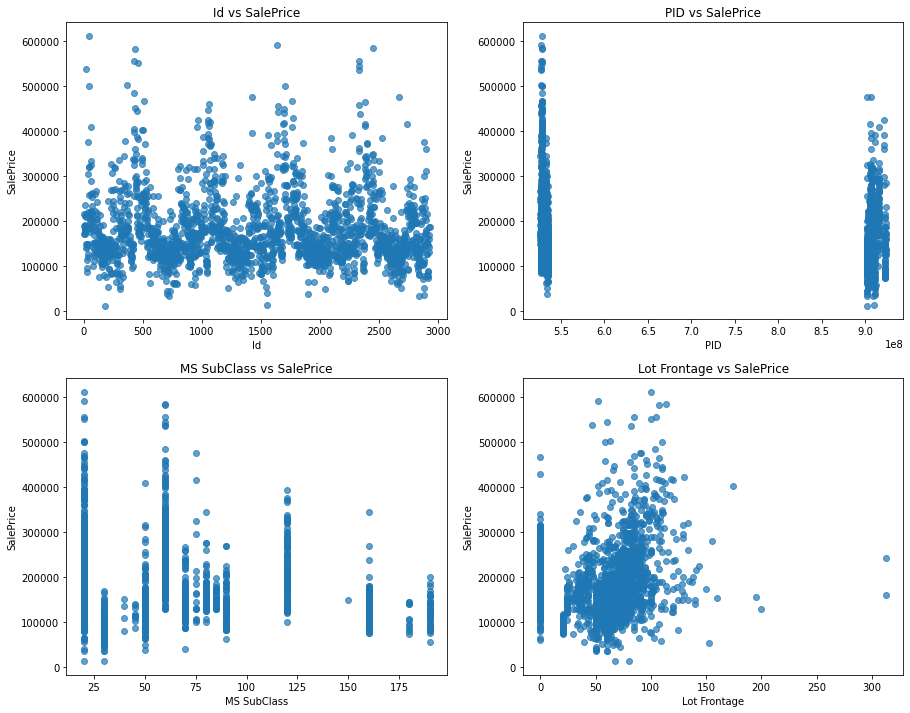

In [31]:
# Plotting scatter plots of numerical features vs SalePrice
subplot_scatter(numberdf2, list(numberdf2.columns)[0:4])

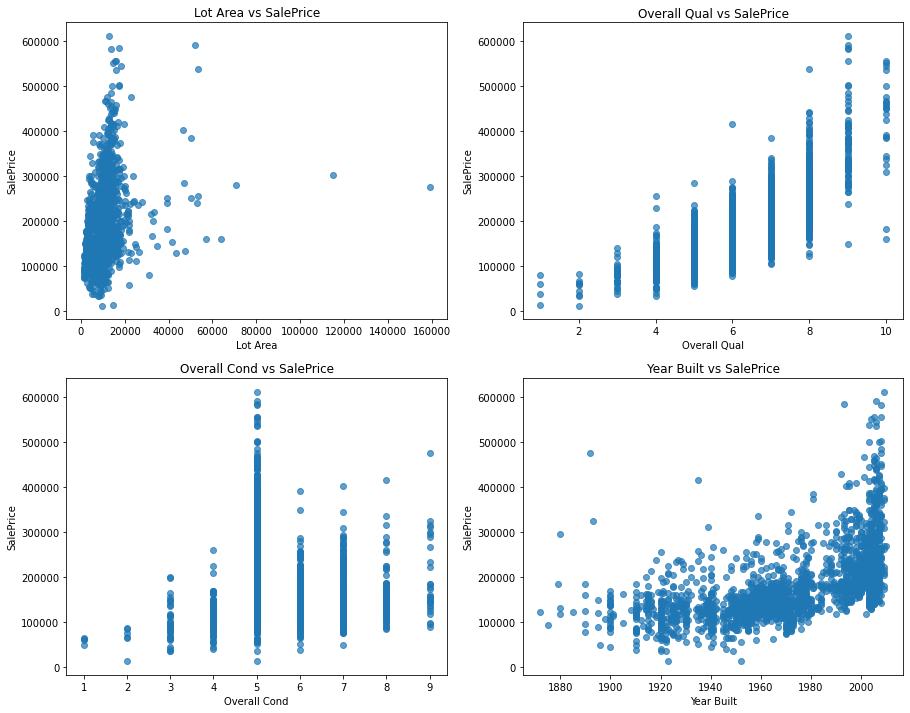

In [32]:
subplot_scatter(numberdf2, list(numberdf2.columns)[4:8])

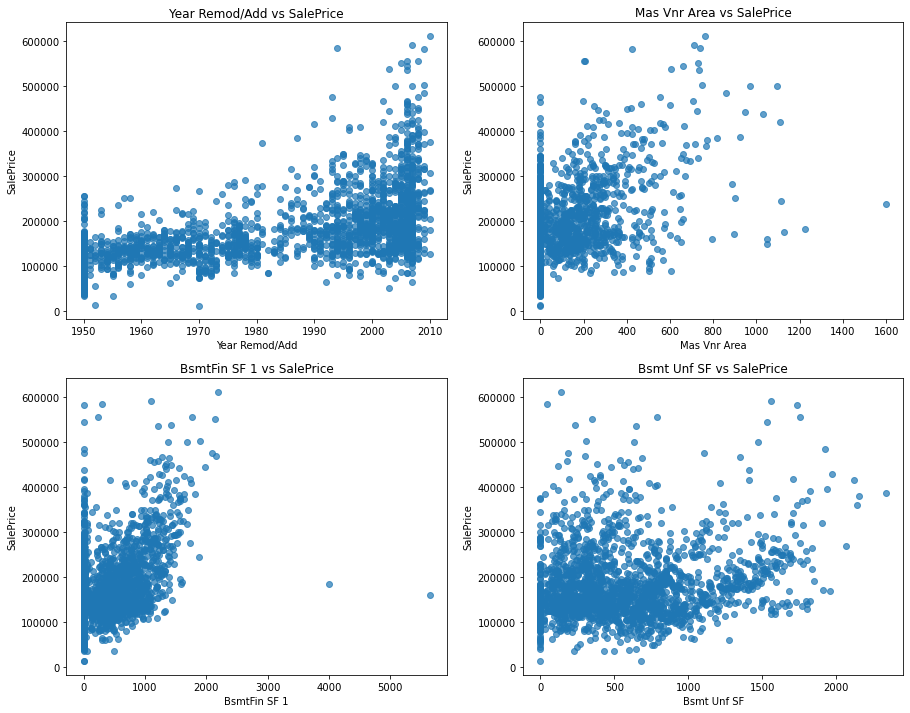

In [33]:
subplot_scatter(numberdf2, list(numberdf2.columns)[8:12])

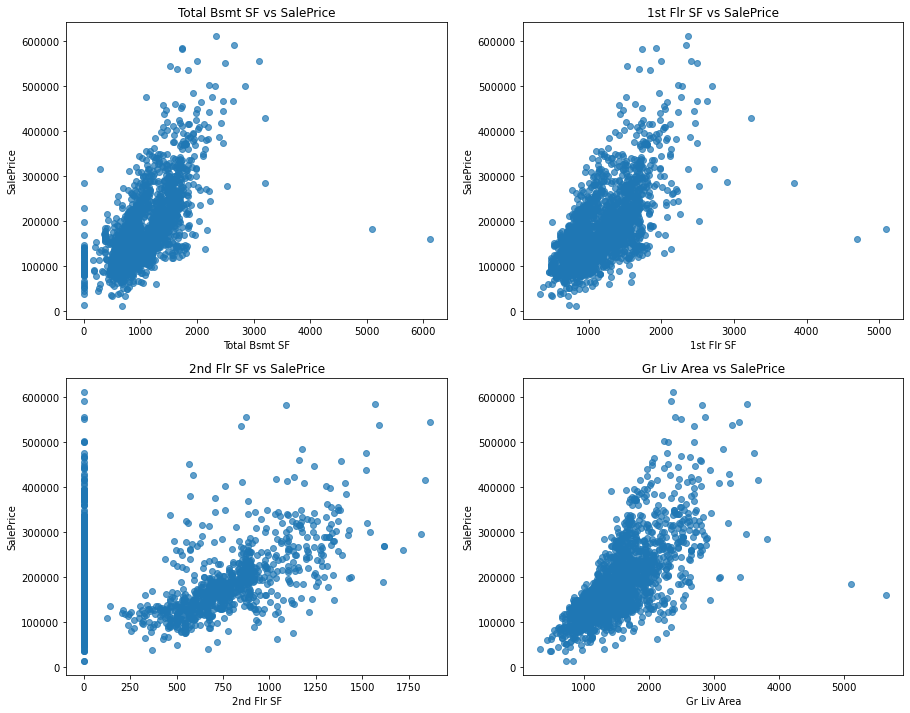

In [34]:
subplot_scatter(numberdf2, list(numberdf2.columns)[12:16])

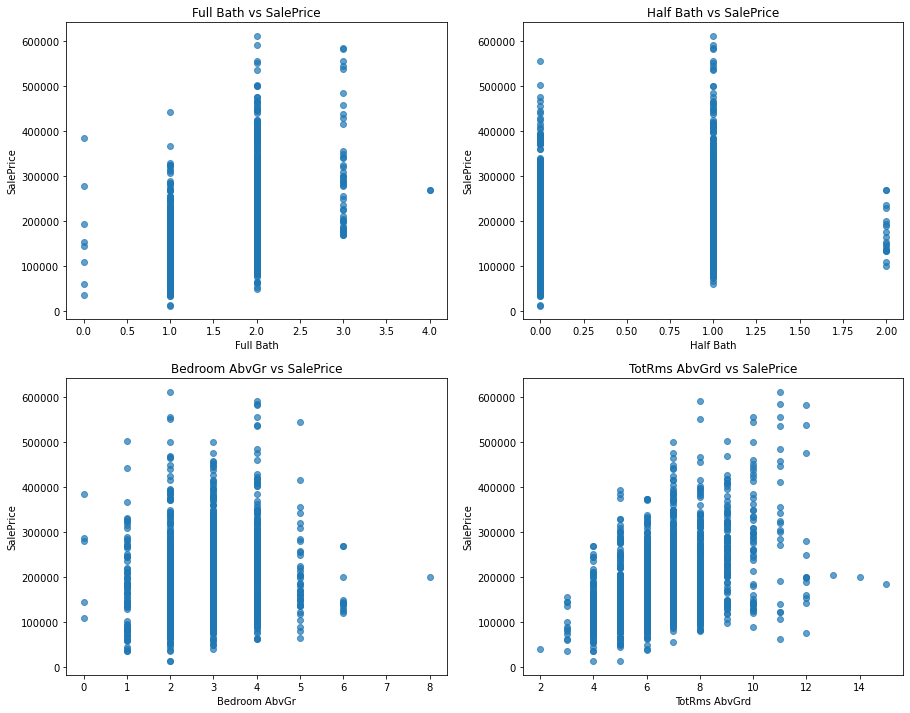

In [35]:
subplot_scatter(numberdf2, list(numberdf2.columns)[16:20])

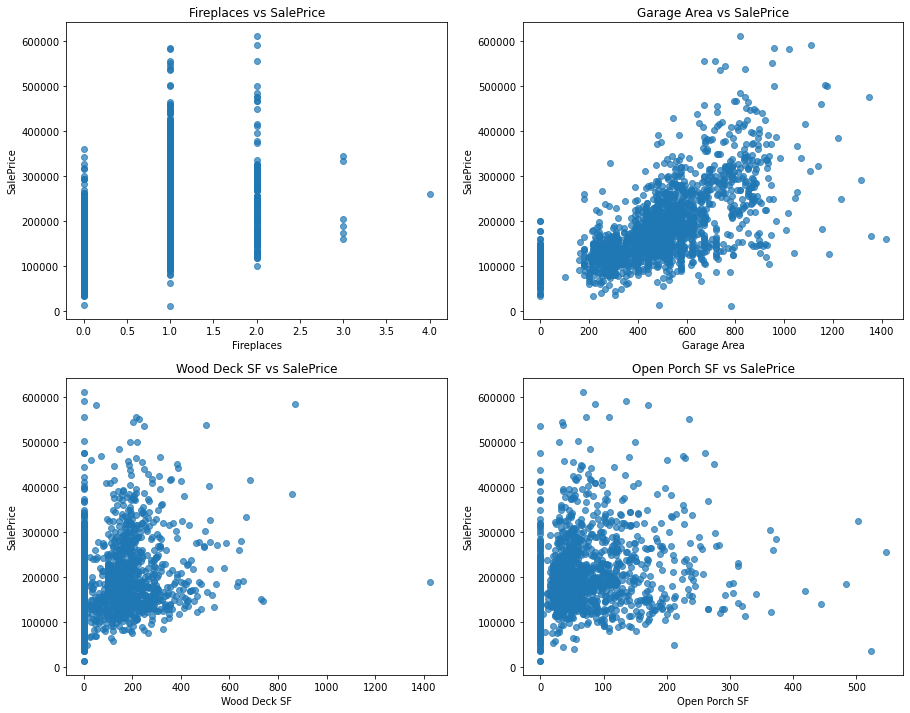

In [36]:
subplot_scatter(numberdf2, list(numberdf2.columns)[20:24])

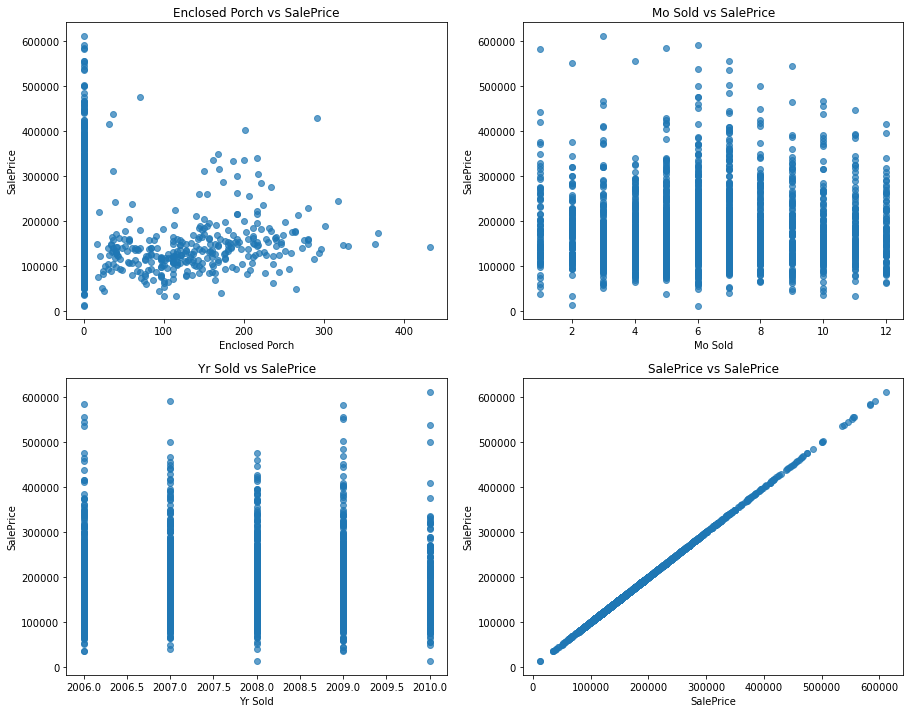

In [37]:
subplot_scatter(numberdf2, list(numberdf2.columns)[24:28])

- MS SubClass feature observed to be of categorical feature and that categories 20, 60 and 120 sell for best price
- Year Built and Year Remod/Add will be re-engineered
- PID feature will be removed since it has no relationship with SalePrice
- Outliers observed in
1. Lot Frontage
2. Lot Area
3. BsmtFin SF 1
4. Total Bsmt SF
5. 1st Flr SF
6. Gr Liv Area
7. Wood Deck SF

### Removing outliers

In [38]:
# Checking for outliers
traindf[['Lot Frontage']].sort_values(by = 'Lot Frontage', ascending = False).head()

,Lot Frontage
1335,313.0
960,313.0
1875,200.0
441,195.0
1263,174.0


In [39]:
# Removing outliers
traindf = traindf[traindf['Lot Frontage'] < 300]

In [40]:
# Checking the remove
traindf[['Lot Frontage']].sort_values(by = 'Lot Frontage', ascending = False).head()

,Lot Frontage
1875,200.0
441,195.0
1263,174.0
1224,160.0
191,155.0


In [41]:
# Checking for outliers
traindf[['Lot Area']].sort_values(by = 'Lot Area', ascending = False).head()

,Lot Area
471,159000
694,115149
1854,70761
745,57200
823,53504


In [42]:
# Removing outliers
traindf = traindf[traindf['Lot Area'] < 100000]

In [43]:
# Checking the remove
traindf[['Lot Area']].sort_values(by = 'Lot Area', ascending = False).head()

,Lot Area
1854,70761
745,57200
823,53504
1052,53227
1843,53107


In [44]:
# Checking for outliers
traindf[['BsmtFin SF 1']].sort_values(by = 'BsmtFin SF 1', ascending = False).head()

,BsmtFin SF 1
1885,4010.0
1671,2188.0
685,2158.0
623,2146.0
1158,2085.0


In [45]:
# Removing outliers
traindf = traindf[traindf['BsmtFin SF 1'] < 4000]

In [46]:
# Checking the remove
traindf[['Total Bsmt SF']].sort_values(by = 'Total Bsmt SF', ascending = False).head()

,Total Bsmt SF
1147,3206.0
328,3200.0
1164,3094.0
1227,2846.0
1964,2660.0


In [47]:
# Outliers here were removed above
traindf[['1st Flr SF']].sort_values(by = '1st Flr SF', ascending = False).head()

,1st Flr SF
616,3820
328,3228
1243,2898
952,2726
1227,2696


In [48]:
# Outliers here were removed above
traindf[['Gr Liv Area']].sort_values(by = 'Gr Liv Area', ascending = False).head()

,Gr Liv Area
616,3820
1897,3672
1035,3608
1692,3500
1939,3493


In [49]:
# Checking for outliers
traindf[['Wood Deck SF']].sort_values(by = 'Wood Deck SF', ascending = False).head()

,Wood Deck SF
966,1424
1692,870
1571,857
40,736
1131,728


In [50]:
# Removing outliers
traindf = traindf[traindf['Wood Deck SF'] < 1400]

In [51]:
# Checking the remove
traindf[['Wood Deck SF']].sort_values(by = 'Wood Deck SF', ascending = False).head()

,Wood Deck SF
1692,870
1571,857
40,736
1131,728
1897,684


In [52]:
traindf.shape

(2045, 56)

In [53]:
# Checking for rows with categories in Neighborhood not listed in dictionary
traindf[(traindf['Neighborhood'] == 'Greens') | (traindf['Neighborhood'] == 'GrnHill') | (traindf['Neighborhood'] == 'Landmrk')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,...,Garage Yr Blt,Garage Finish,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,916253320,120,RM,0.0,9763,IR1,Lvl,Inside,GrnHill,...,1998.0,Fin,286.0,0,0,0,9,2007,WD,330000
1104,2521,533253090,120,RL,40.0,3874,IR1,Lvl,Inside,Greens,...,1980.0,Fin,484.0,133,78,0,7,2006,WD,190000
1121,2789,907230240,160,RH,0.0,3612,IR1,Lvl,Inside,Landmrk,...,1993.0,Unf,484.0,0,48,0,6,2006,WD,137000
1211,2893,916252170,120,RM,0.0,8239,IR1,Lvl,Inside,GrnHill,...,1986.0,RFn,312.0,0,0,0,11,2006,WD,230000
1351,108,533253210,120,RL,40.0,3880,IR1,Lvl,Inside,Greens,...,1978.0,Fin,484.0,223,78,0,1,2010,WD,206000
1795,2522,533253160,120,RL,40.0,3876,IR1,Lvl,Inside,Greens,...,1978.0,Fin,484.0,133,60,0,7,2006,WD,170000


- Since there are only 6 of them, we will remove them.

In [54]:
traindf = traindf[traindf.Neighborhood != 'Greens']

In [55]:
traindf = traindf[traindf.Neighborhood != 'GrnHill']

In [56]:
traindf = traindf[traindf.Neighborhood != 'Landmrk']

In [57]:
traindf.drop('PID', axis = 1, inplace = True)
testdf.drop('PID', axis = 1, inplace = True)

In [58]:
traindf.shape

(2039, 55)

In [59]:
testdf.shape

(879, 54)

### Histograms

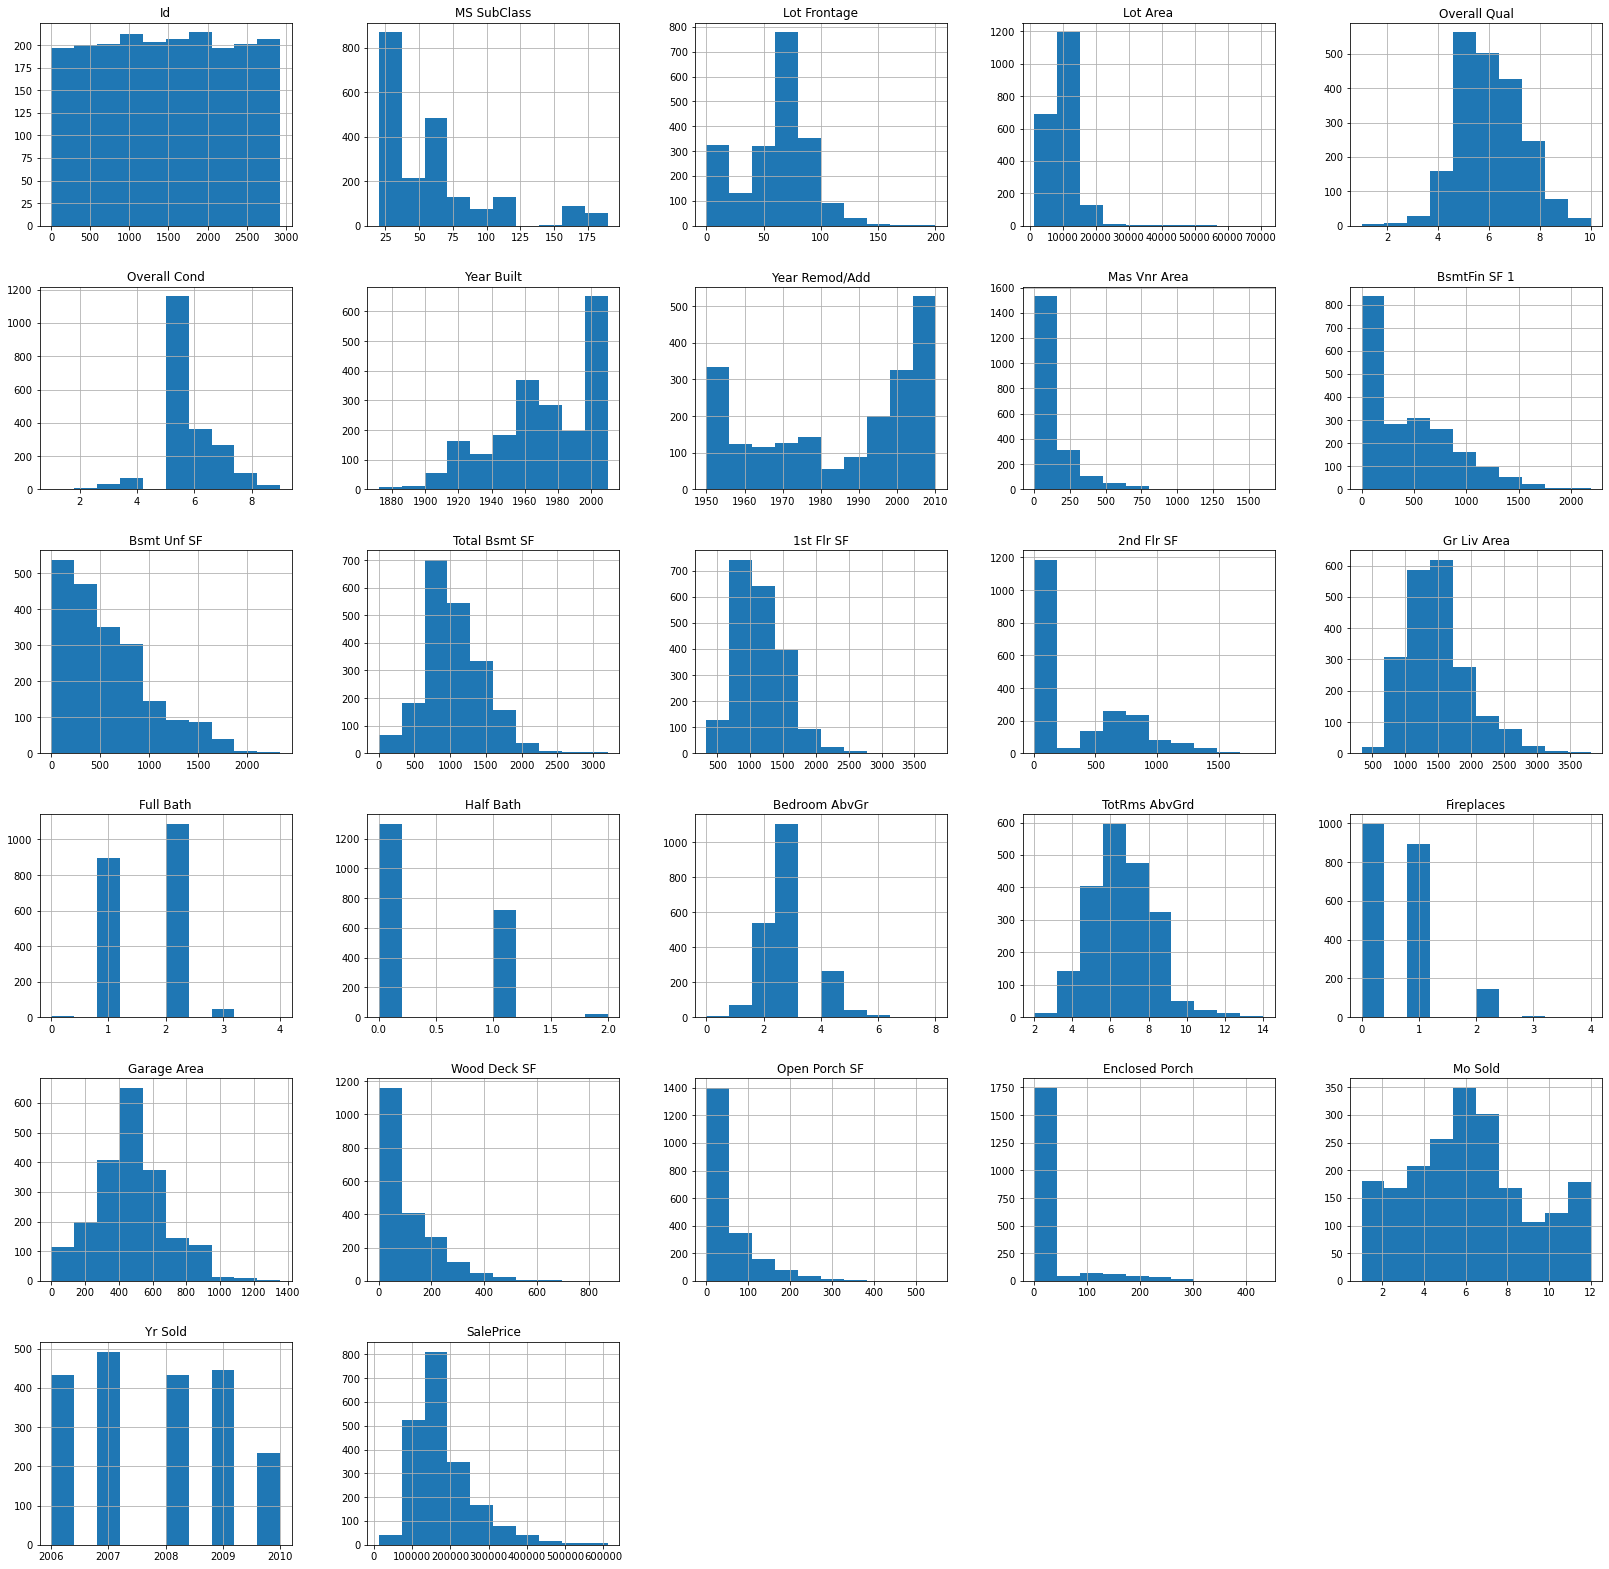

In [60]:
# Plottiing histgrams of features
traindf.hist(figsize = (28, 28));

- Except for Overall Qual and Mo Sold, all of the distributions are not normally distributed.

### Boxplots

In [61]:
# Define a function to plot box plots 
def subplot_box(df, x):
        sns.catplot(x = x, y = 'SalePrice', kind = 'box', data = df, height=8, aspect=16/8)

In [62]:
objectdf2 = traindf.select_dtypes(include=['object'])

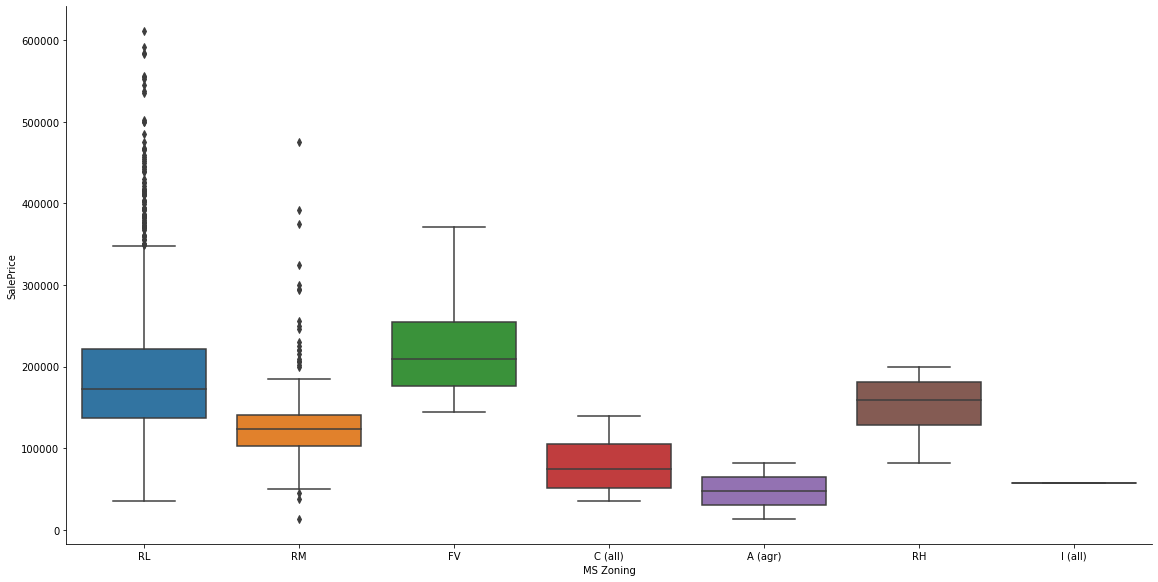

In [63]:
# Plotting box plots of categorical features vs SalePrice
subplot_box(traindf, 'MS Zoning')
# Sufficient variance observed between categories. FV and RL sell for best price

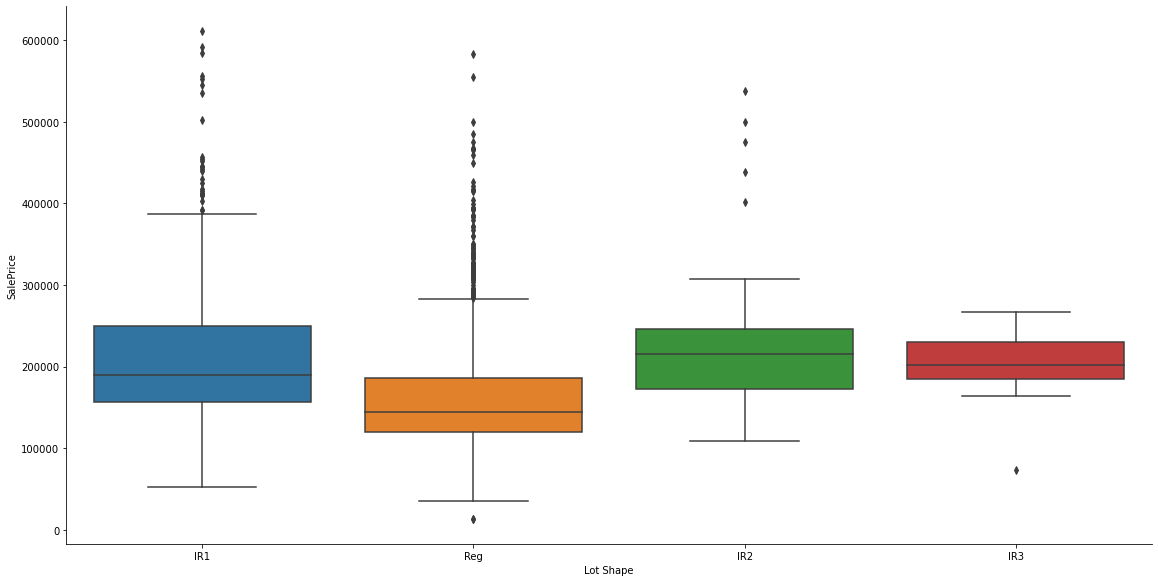

In [64]:
subplot_box(traindf, 'Lot Shape')
# Low variance between categories observed, will drop feature

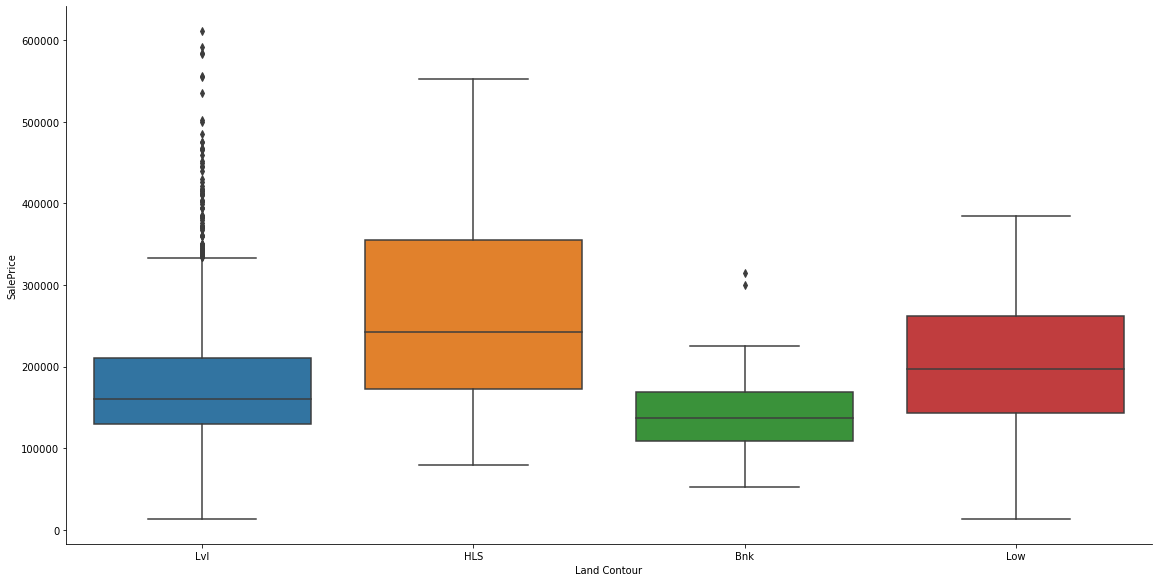

In [65]:
subplot_box(traindf, 'Land Contour')
# Sufficient variance observed between categories. HLS sell for best price

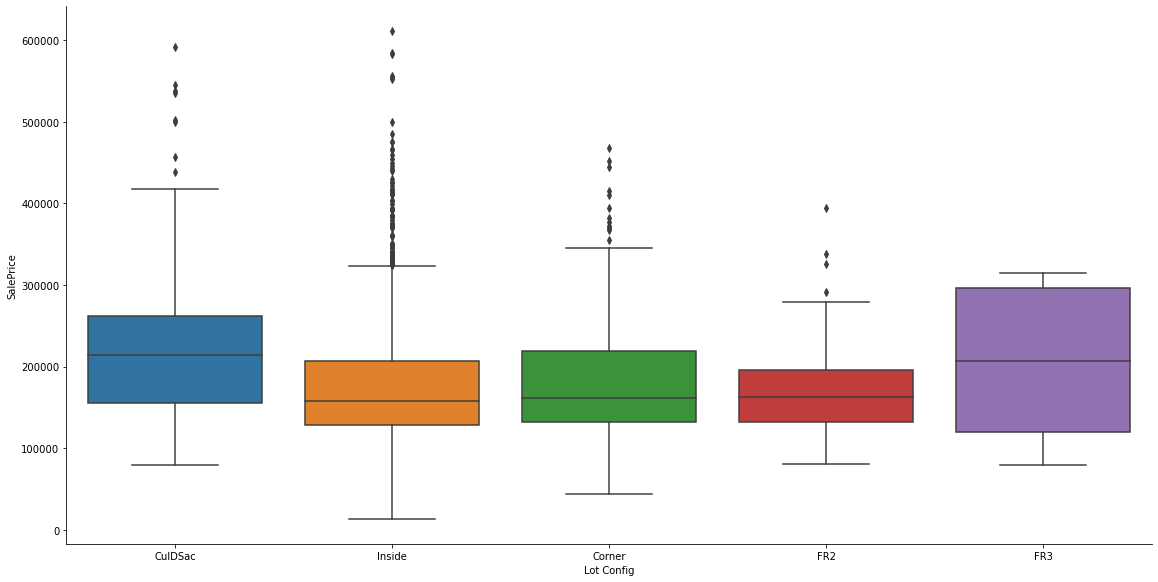

In [66]:
subplot_box(traindf, 'Lot Config')
# Low variance observed between categories, will drop feature

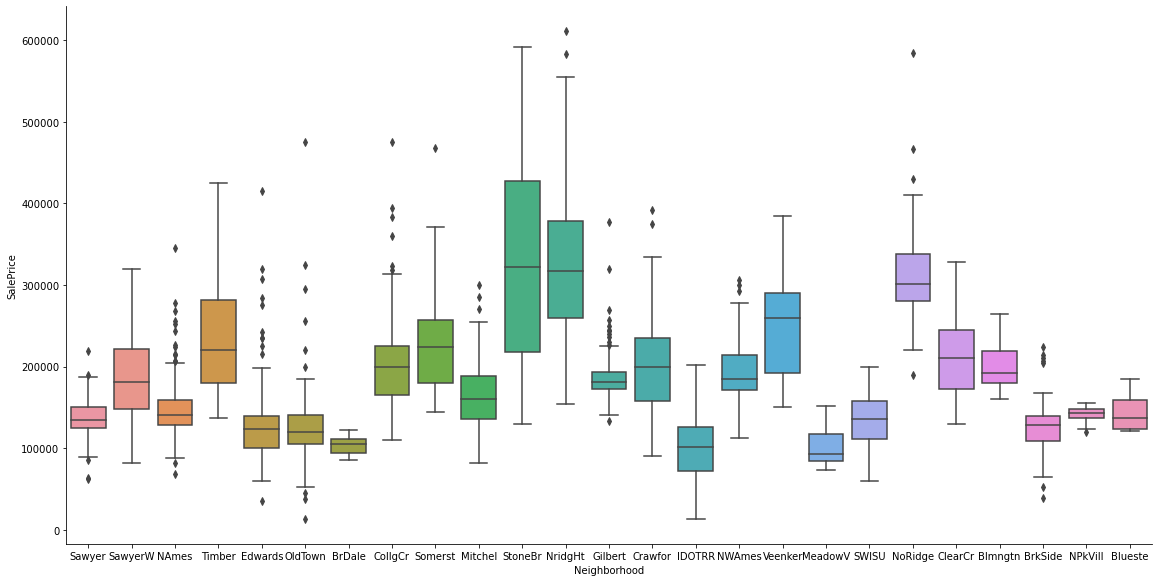

In [67]:
subplot_box(traindf, 'Neighborhood')
# Sufficient variance observed between categories. StoneBr, NridgHt, NoRidge and Veenker sell for best price 

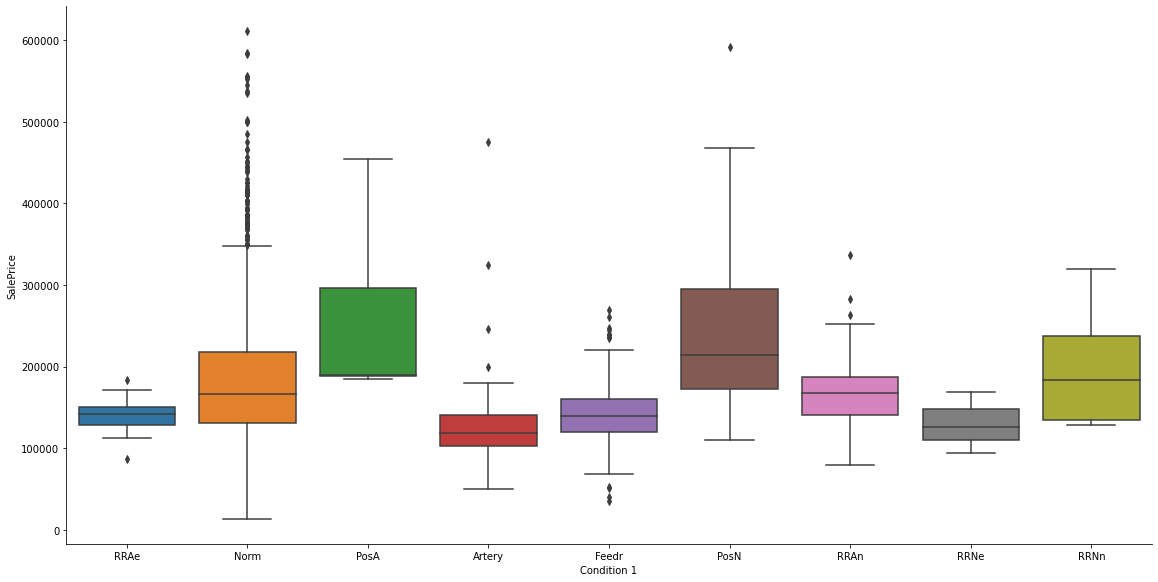

In [68]:
subplot_box(traindf, 'Condition 1')
# Sufficient variance observed between categories. PosA and PosN sell for best price

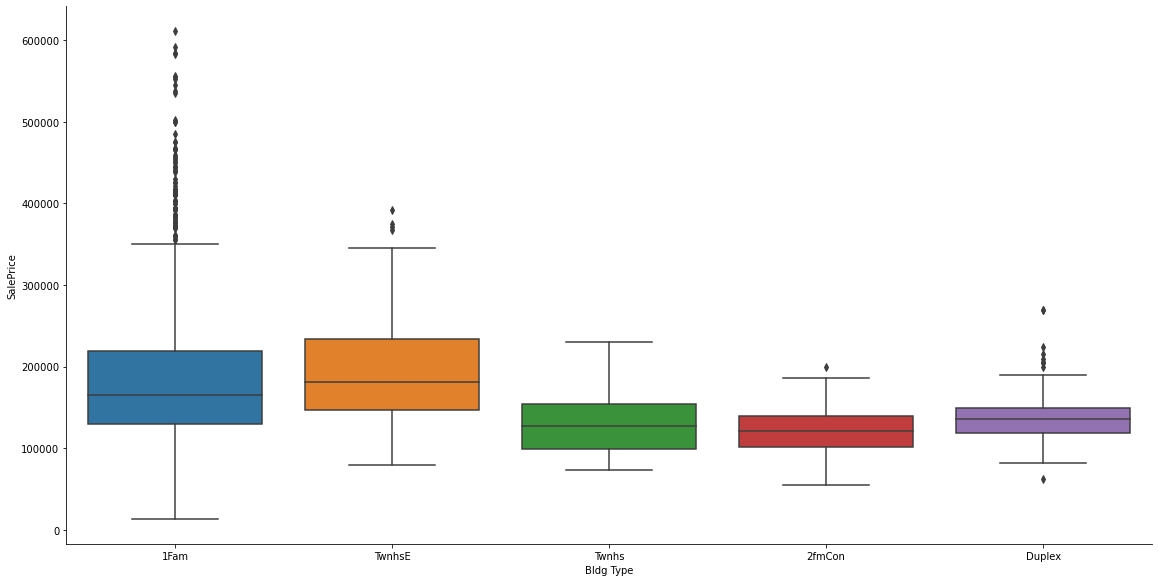

In [69]:
subplot_box(traindf, 'Bldg Type')
# Low variance observed between categories, will drop feature

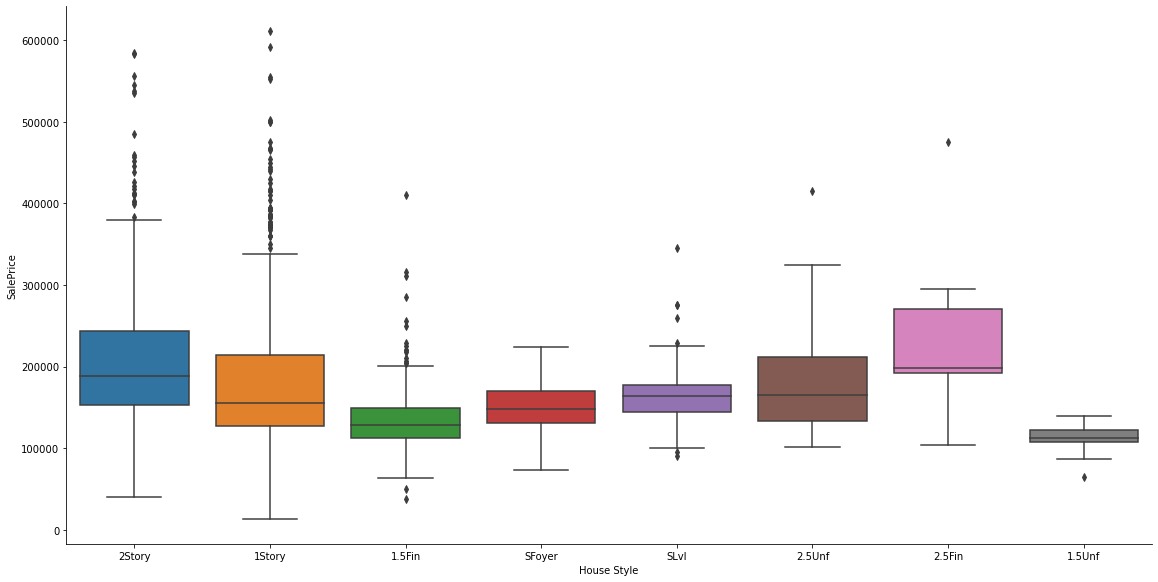

In [70]:
subplot_box(traindf, 'House Style')
# Low variance observed between categories, will drop feature

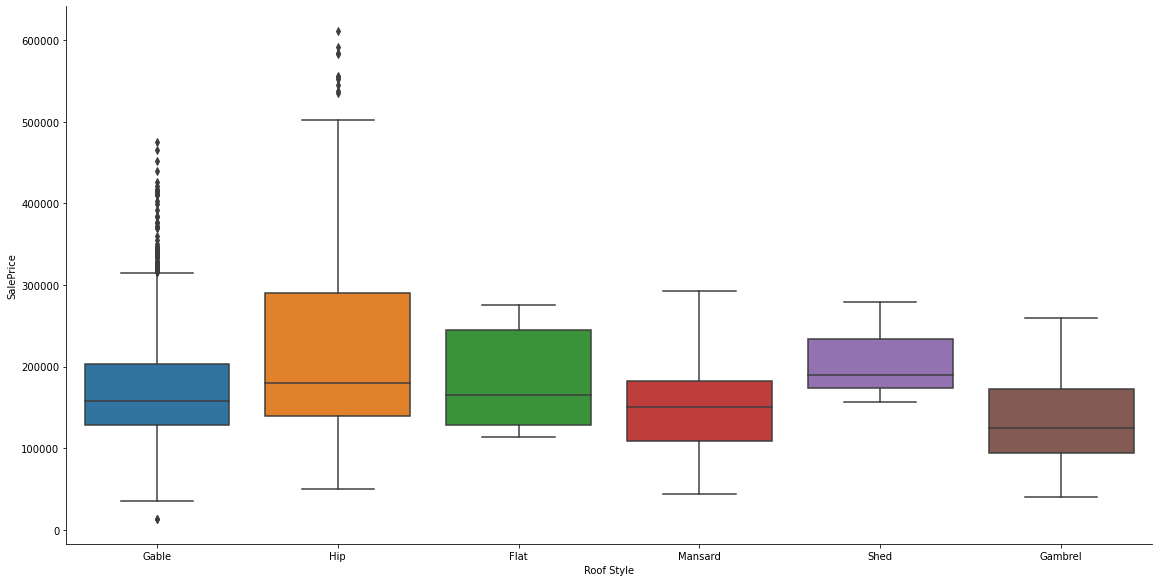

In [71]:
subplot_box(traindf, 'Roof Style')
# Low variance observed between categories, will drop feature

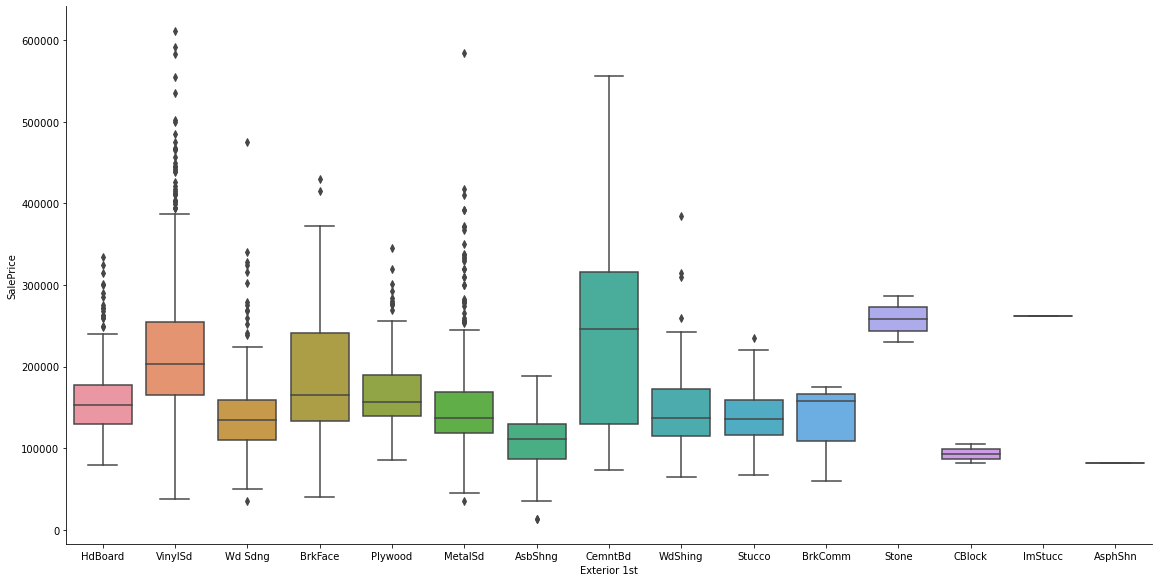

In [72]:
subplot_box(traindf, 'Exterior 1st')
# Since we have Exter Qual and Exter Cond which tells us the quality and condition of the exterior, this feature will be dropped

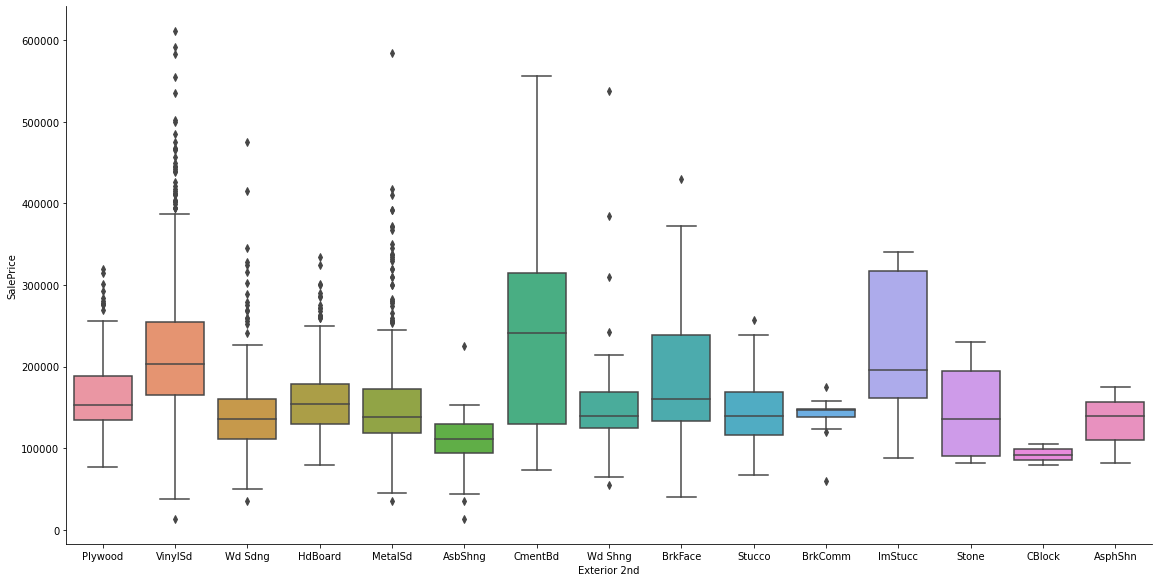

In [73]:
subplot_box(traindf, 'Exterior 2nd')
# Since we have Exter Qual and Exter Cond which tells us the quality and condition of the exterior, this feature will be dropped

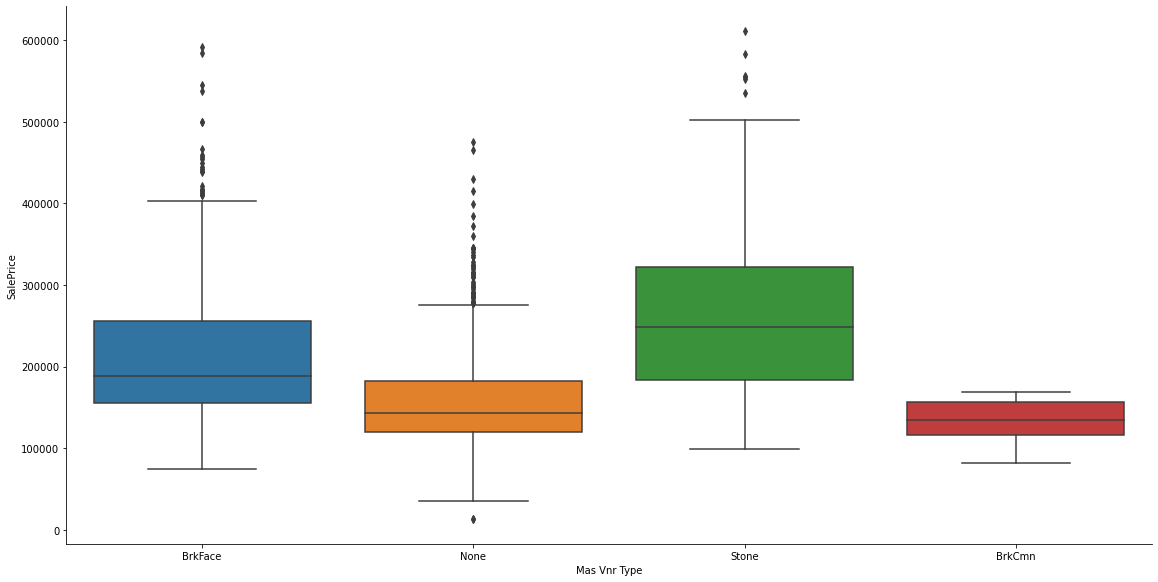

In [74]:
subplot_box(traindf, 'Mas Vnr Type')
# Sufficient variance observed between categories. Stone sell for best price

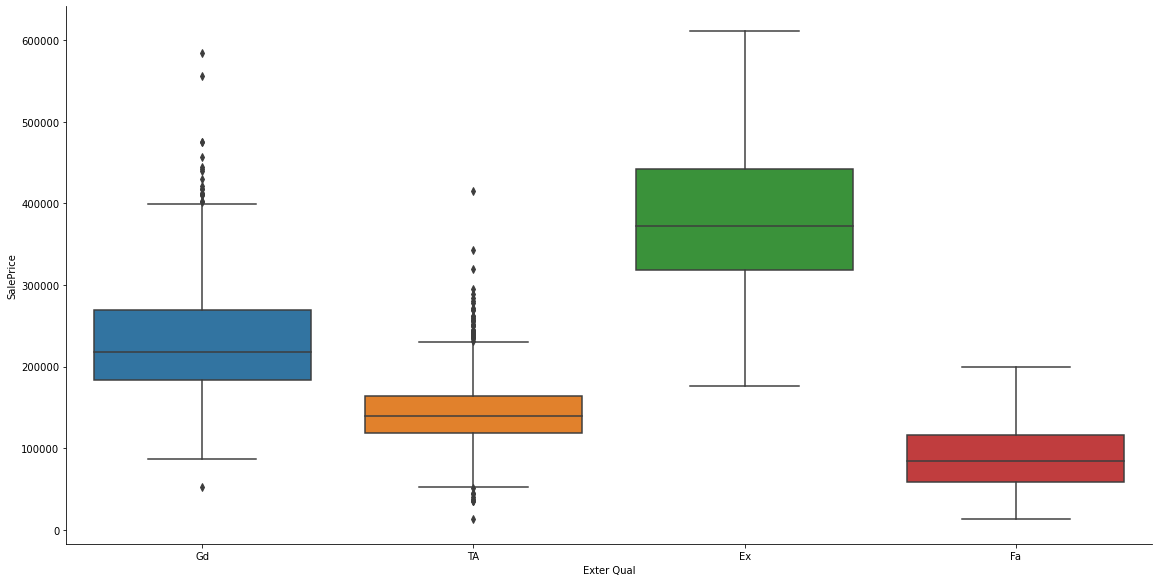

In [75]:
subplot_box(traindf, 'Exter Qual')
# Sufficient variance observed between categories. Ex sell for best price

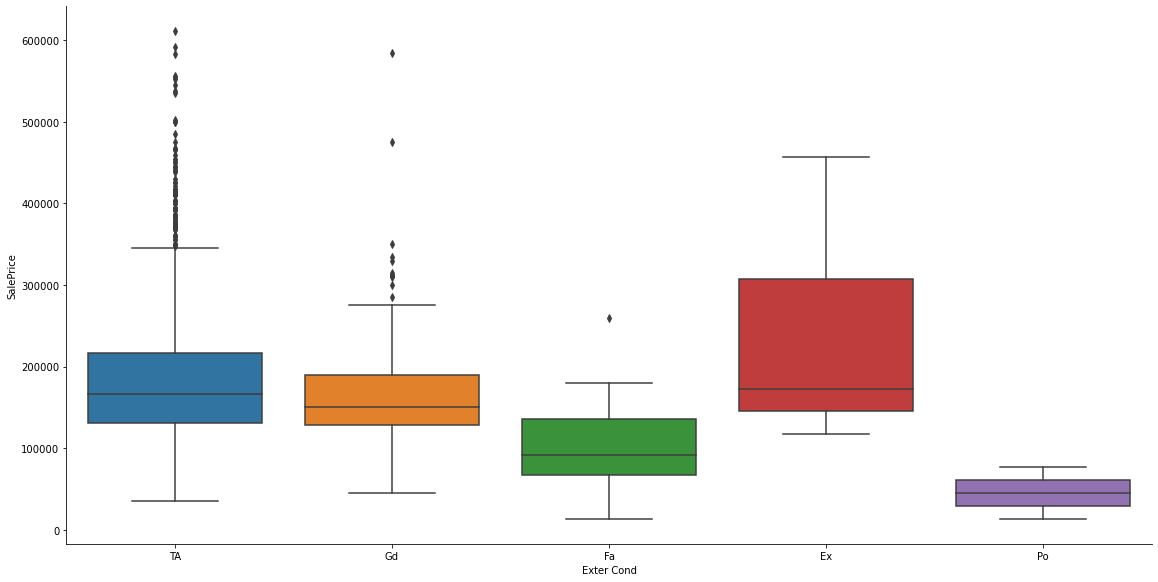

In [76]:
subplot_box(traindf, 'Exter Cond')
# Sufficient variance observed between categories. Ex sell for best price

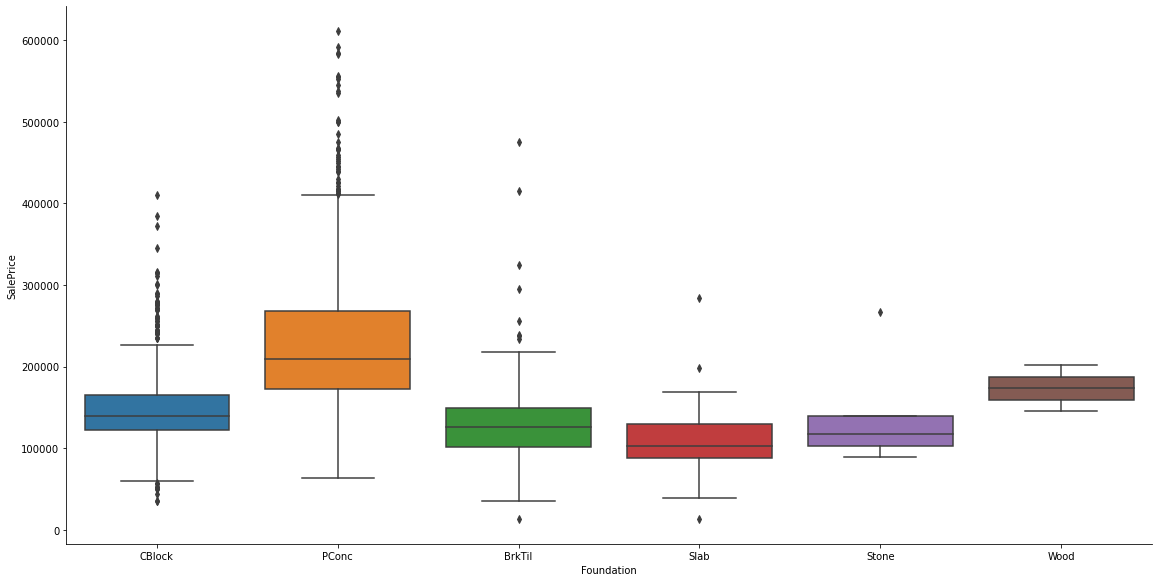

In [77]:
subplot_box(traindf, 'Foundation')
# Low variance observed between categories, will drop feature

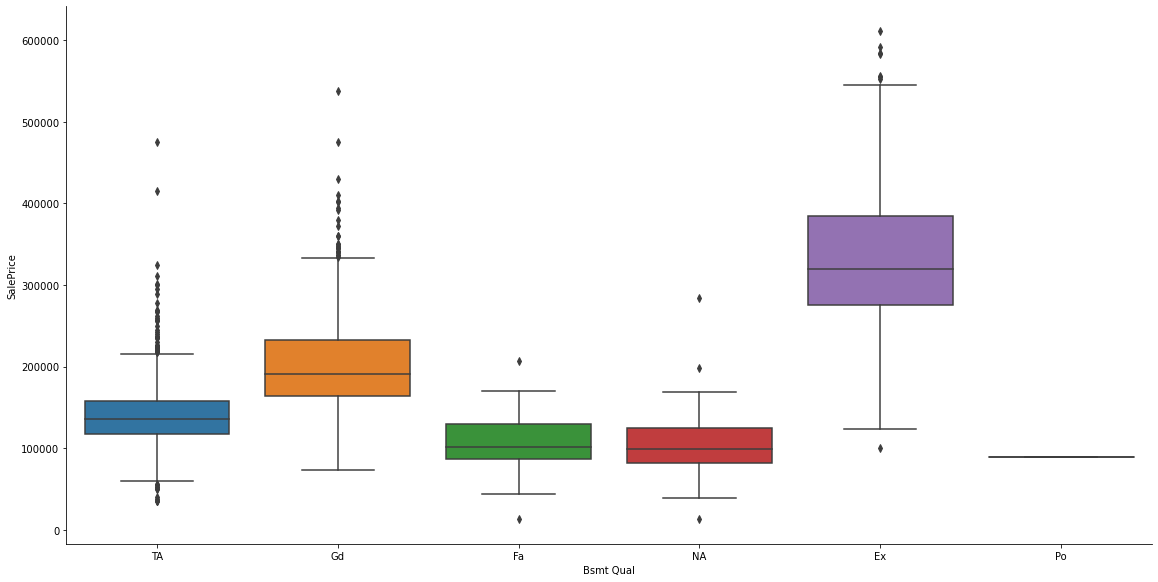

In [78]:
subplot_box(traindf, 'Bsmt Qual')
# Sufficient variance observed between categories. Ex and Gd sell for best price

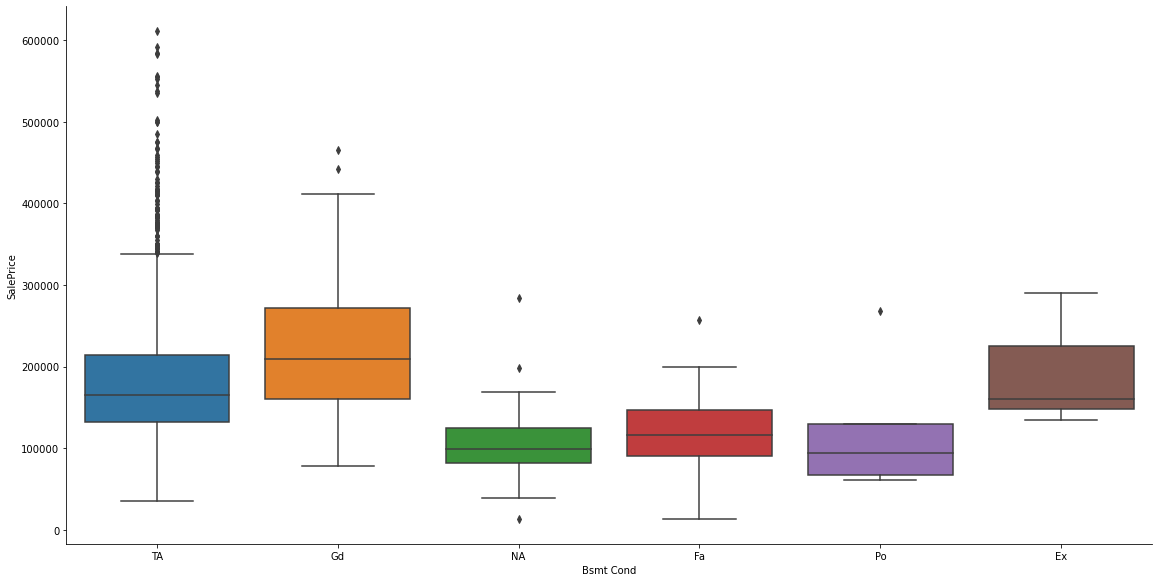

In [79]:
subplot_box(traindf, 'Bsmt Cond')
# Sufficient variance observed between categories. Ex and Gd sell for best price

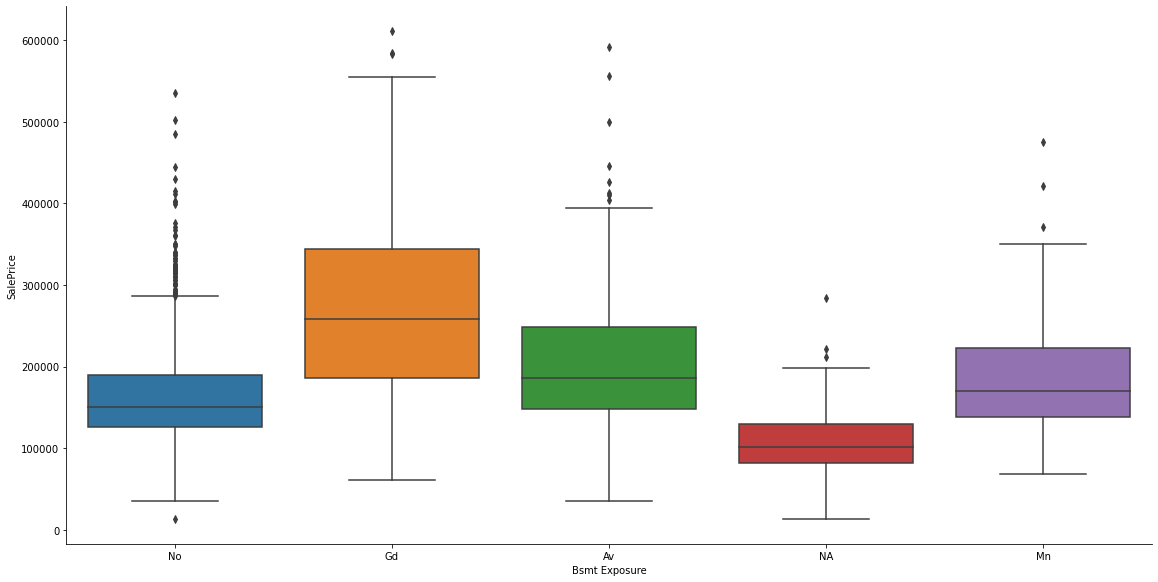

In [80]:
subplot_box(traindf, 'Bsmt Exposure')
# Sufficient variance observed between categories. Gd sell for best price

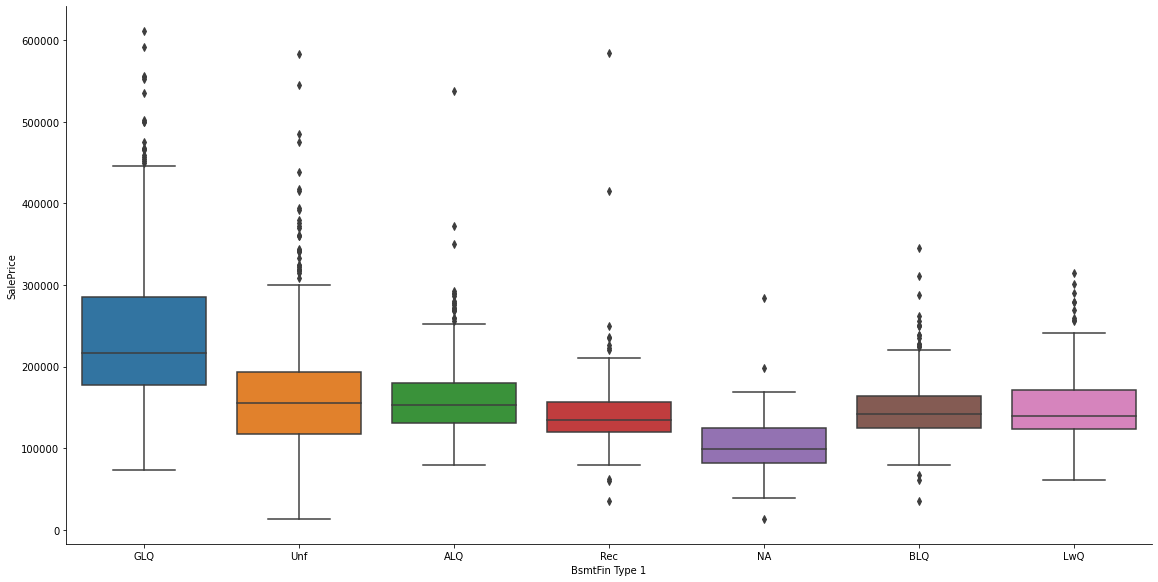

In [81]:
subplot_box(traindf, 'BsmtFin Type 1')
# Since we have Bsmt Qual and Bsmt Cond which tells us the quality and condition of the basement, this feature will be dropped

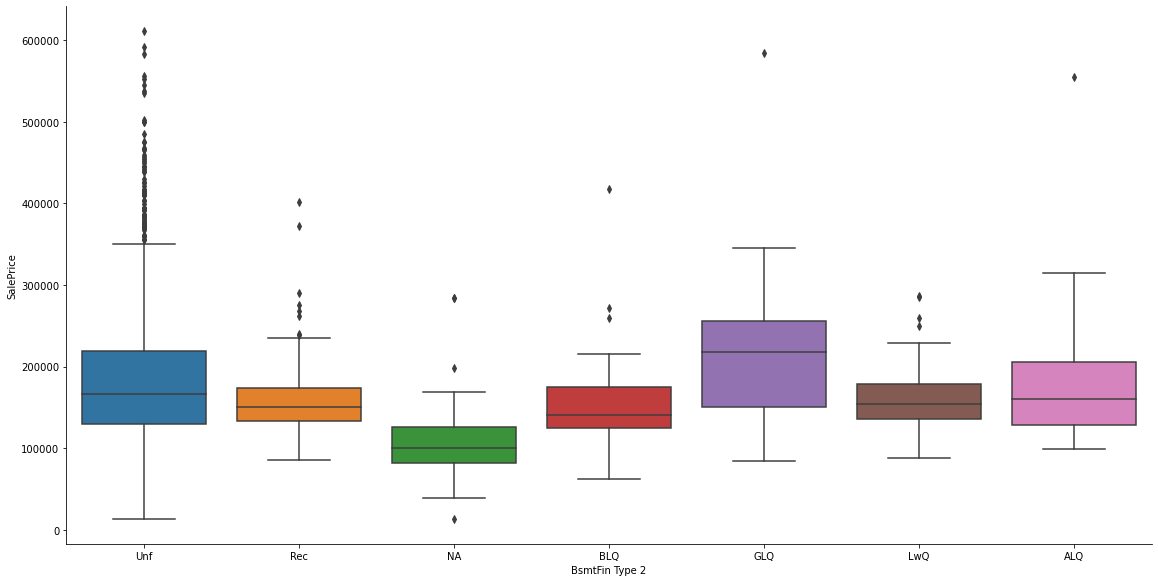

In [82]:
subplot_box(traindf, 'BsmtFin Type 2')
# Since we have Bsmt Qual and Bsmt Cond which tells us the quality and condition of the basement, this feature will be dropped

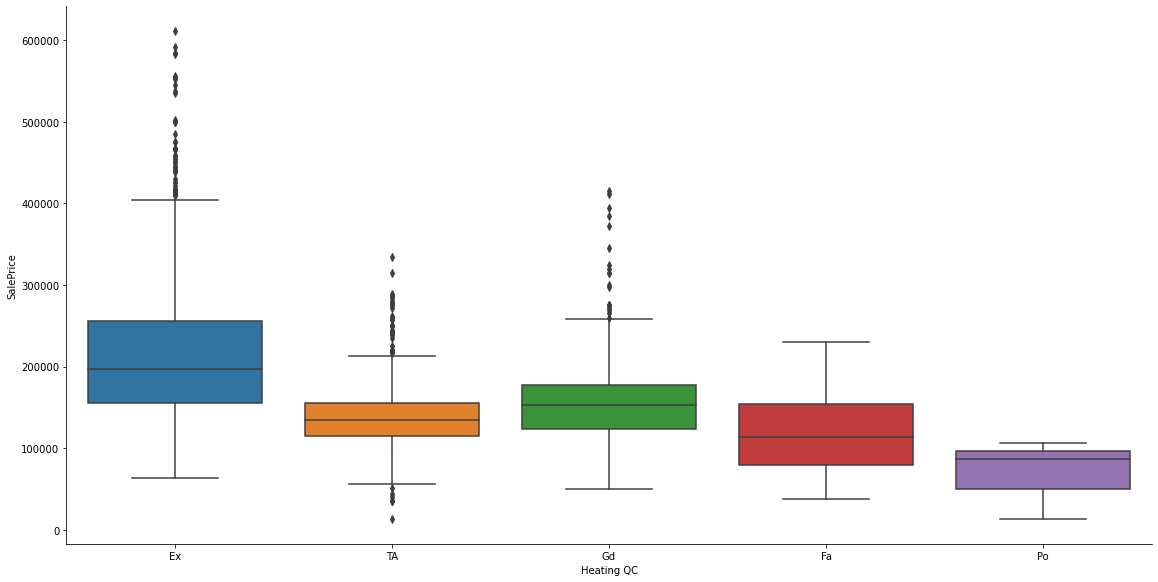

In [83]:
subplot_box(traindf, 'Heating QC')
# Sufficient variance observed between categories. Ex sell for best price

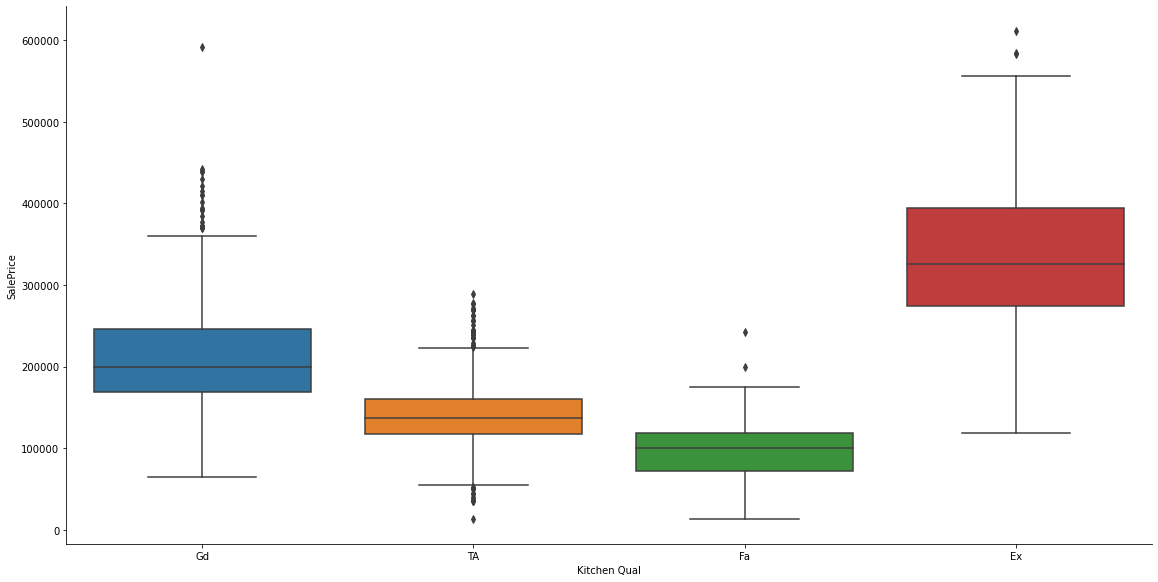

In [84]:
subplot_box(traindf, 'Kitchen Qual')
# Sufficient variance observed between categories. Ex sell for best price

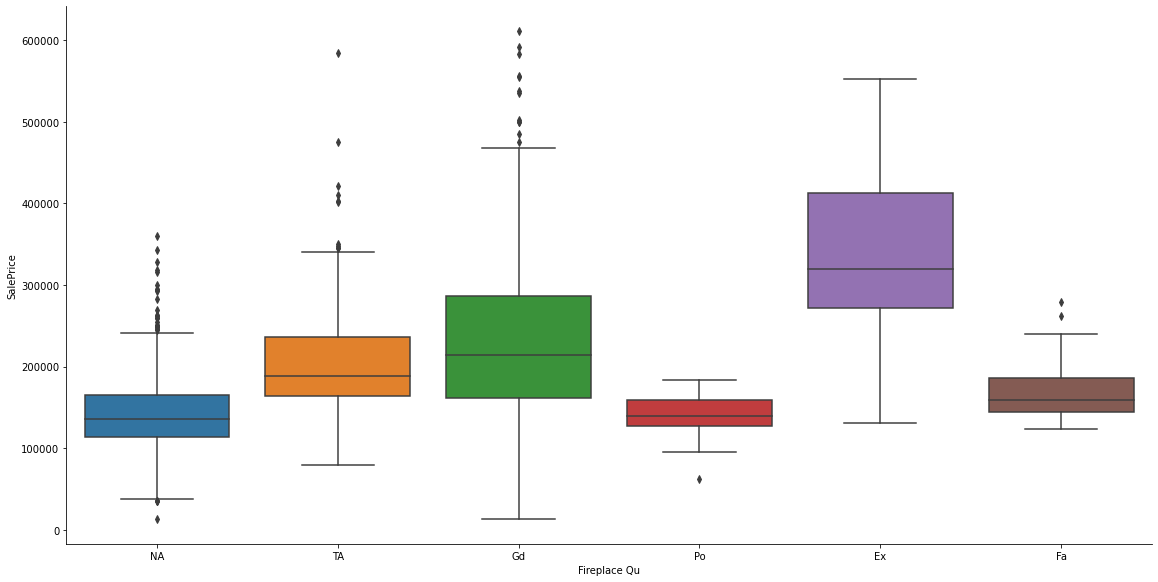

In [85]:
subplot_box(traindf, 'Fireplace Qu')
# Sufficient variance observed between categories. Ex and Gd sell for best price

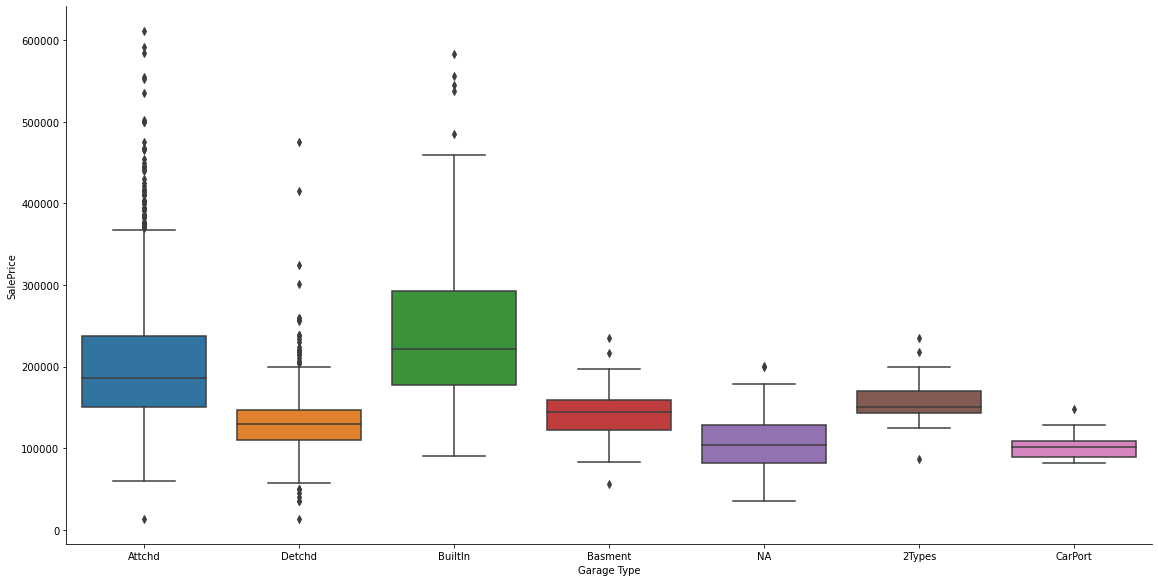

In [86]:
subplot_box(traindf, 'Garage Type')
# Sufficient variance observed between categories. Builtin and Attchd sell for best price

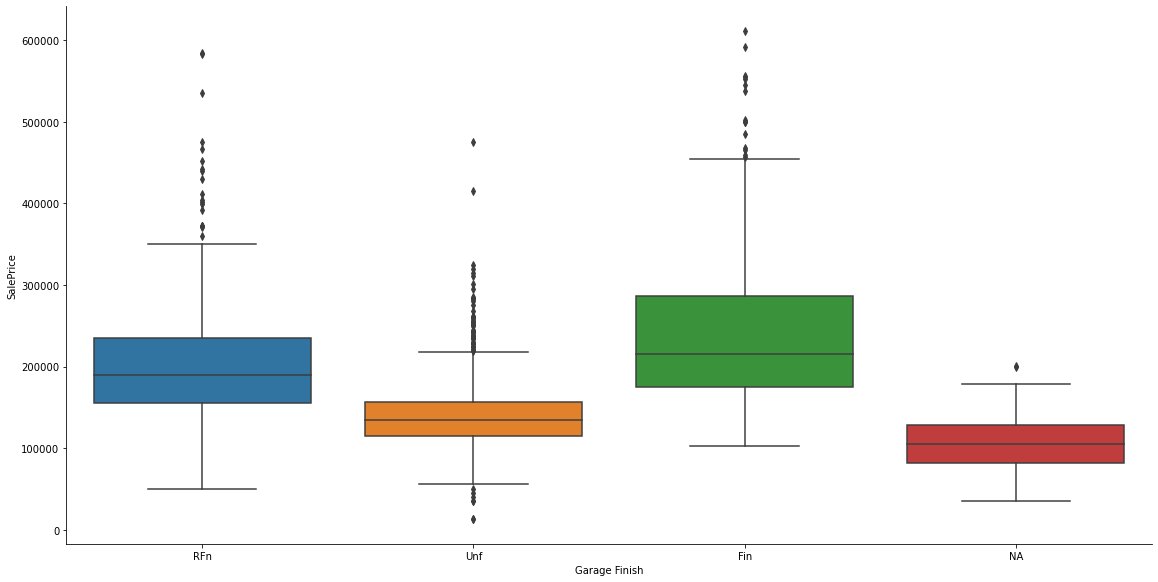

In [87]:
subplot_box(traindf, 'Garage Finish')
# Sufficient variance observed between categories. Fin sell for best price

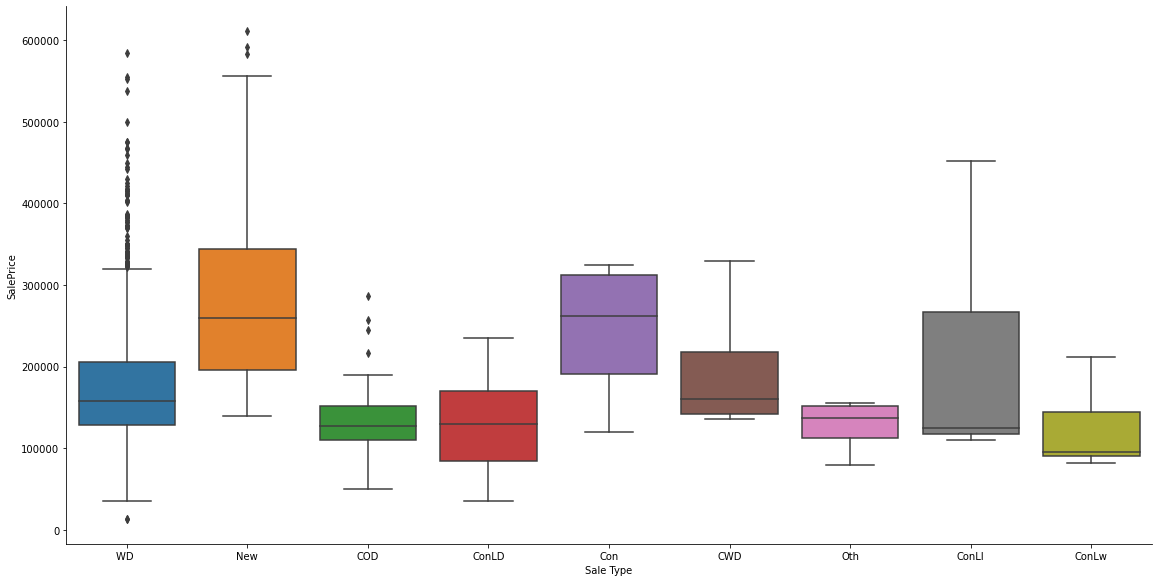

In [88]:
subplot_box(traindf, 'Sale Type')
# Sufficient variance observed between categories. New sell for best price

### Feature engineering

In [89]:
# Engineering all features accordingly as mentioned above
traindf['MS SubClass'] = traindf['MS SubClass'].map(lambda x: 1 if x in [20, 60, 120] else 0)
testdf['MS SubClass'] = testdf['MS SubClass'].map(lambda x: 1 if x in [20, 60, 120] else 0)

In [90]:
# Creating 'Age' feature by subtracting Yr Sold by Year Remod/Add
traindf['Age'] = traindf['Yr Sold'] - traindf['Year Remod/Add']
testdf['Age'] = testdf['Yr Sold'] - testdf['Year Remod/Add']

In [91]:
# Dropping engineered features Yr Sold and Year Remod/Add
traindf.drop(['Yr Sold', 'Year Remod/Add'], axis = 1, inplace = True)
testdf.drop(['Yr Sold', 'Year Remod/Add'], axis = 1, inplace = True)

In [92]:
traindf['MS Zoning'] = traindf['MS Zoning'].map(lambda x: 1 if x in ['FV', 'RL'] else 0)
testdf['MS Zoning'] = testdf['MS Zoning'].map(lambda x: 1 if x in ['FV', 'RL'] else 0)

In [93]:
traindf['Land Contour'] = traindf['Land Contour'].map(lambda x: 1 if x == 'HLS' else 0)
testdf['Land Contour'] = testdf['Land Contour'].map(lambda x: 1 if x == 'HLS' else 0)

In [94]:
traindf['Neighborhood'] = traindf['Neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge', 'Veenker'] else 0)
testdf['Neighborhood'] = testdf['Neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge', 'Veenker'] else 0)

In [95]:
traindf['Condition 1'] = traindf['Condition 1'].map(lambda x: 1 if x in ['PosA', 'PosN'] else 0)
testdf['Condition 1'] = testdf['Condition 1'].map(lambda x: 1 if x in ['PosA', 'PosN'] else 0)

In [96]:
traindf['Mas Vnr Type'] = traindf['Mas Vnr Type'].map(lambda x: 1 if x == 'Stone' else 0)
testdf['Mas Vnr Type'] = testdf['Mas Vnr Type'].map(lambda x: 1 if x == 'Stone' else 0)

In [97]:
traindf['Exter Qual'] = traindf['Exter Qual'].map(lambda x: 1 if x == 'Ex' else 0)
testdf['Exter Qual'] = testdf['Exter Qual'].map(lambda x: 1 if x == 'Ex' else 0)

In [98]:
traindf['Exter Cond'] = traindf['Exter Cond'].map(lambda x: 1 if x == 'Ex' else 0)
testdf['Exter Cond'] = testdf['Exter Cond'].map(lambda x: 1 if x == 'Ex' else 0)

In [99]:
traindf['Bsmt Qual'] = traindf['Bsmt Qual'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)
testdf['Bsmt Qual'] = testdf['Bsmt Qual'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)

In [100]:
traindf['Bsmt Cond'] = traindf['Bsmt Cond'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)
testdf['Bsmt Cond'] = testdf['Bsmt Cond'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)

In [101]:
traindf['Bsmt Exposure'] = traindf['Bsmt Exposure'].map(lambda x: 1 if x == 'Gd' else 0)
testdf['Bsmt Exposure'] = testdf['Bsmt Exposure'].map(lambda x: 1 if x == 'Gd' else 0)

In [102]:
traindf['Heating QC'] = traindf['Heating QC'].map(lambda x: 1 if x == 'Ex' else 0)
testdf['Heating QC'] = testdf['Heating QC'].map(lambda x: 1 if x == 'Ex' else 0)

In [103]:
traindf['Kitchen Qual'] = traindf['Kitchen Qual'].map(lambda x: 1 if x == 'Ex' else 0)
testdf['Kitchen Qual'] = testdf['Kitchen Qual'].map(lambda x: 1 if x == 'Ex' else 0)

In [104]:
traindf['Fireplace Qu'] = traindf['Fireplace Qu'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)
testdf['Fireplace Qu'] = testdf['Fireplace Qu'].map(lambda x: 1 if x in ['Ex', 'Gd'] else 0)

In [105]:
traindf['Garage Type'] = traindf['Garage Type'].map(lambda x: 1 if x in ['Builtin', 'Attchd'] else 0)
testdf['Garage Type'] = testdf['Garage Type'].map(lambda x: 1 if x in ['Builtin', 'Attchd'] else 0)

In [106]:
traindf['Garage Finish'] = traindf['Garage Finish'].map(lambda x: 1 if x == 'Fin' else 0)
testdf['Garage Finish'] = testdf['Garage Finish'].map(lambda x: 1 if x == 'Fin' else 0)

In [107]:
traindf['Sale Type'] = traindf['Sale Type'].map(lambda x: 1 if x == 'New' else 0)
testdf['Sale Type'] = testdf['Sale Type'].map(lambda x: 1 if x == 'New' else 0)

### Heatmap

In [108]:
# Correlations between SalePrice and features
traindf.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.804912
Gr Liv Area,0.720230
Total Bsmt SF,0.666894
Garage Area,0.657259
1st Flr SF,0.647628
Neighborhood,0.604453
Year Built,0.573548
Bsmt Qual,0.560077
Kitchen Qual,0.557214


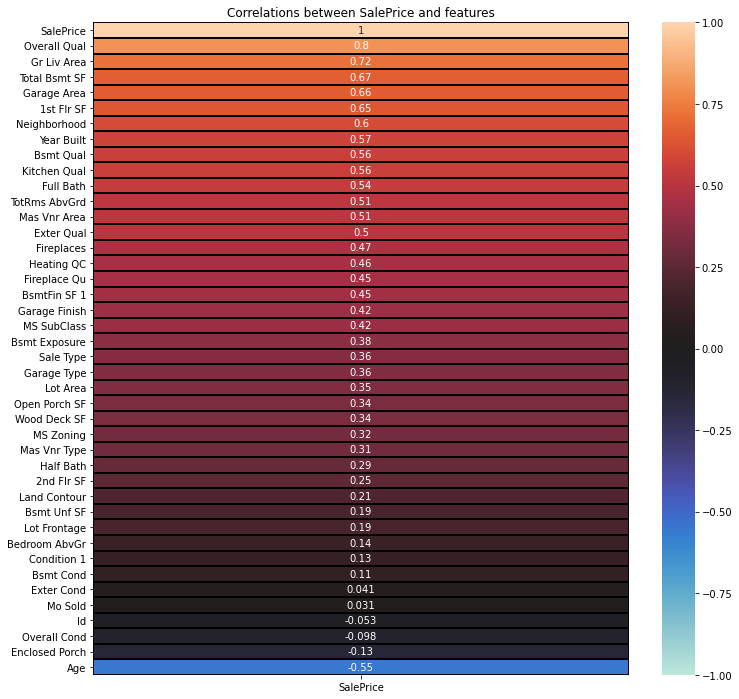

In [109]:
# Heatmap of correlations between SalePrice and features
plt.figure(figsize = (12, 12))
plt.title('Correlations between SalePrice and features')
sns.heatmap(traindf.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), 
            vmin=-1, vmax=1, center= 0, annot = True, linewidths=1, linecolor='black', cmap = 'icefire');

# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

### 20 features with the highest correlation to SalePrice

1. Overall Qual
2. Gr Liv Area
3. Total Bsmt SF
4. Garage Area
5. 1st Flr SF
6. Neighborhood
7. Year Built
8. Bsmt Qual
9. Kitchen Qual
10. Full Bath
11. TotRms AbvGrd
12. Mas Vnr Area
13. Exter Qual
14. Age
15. Fireplaces
16. Heating QC
17. Fireplace Qu
18. BsmtFin SF 1
19. Garage Finish
20. MS SubClass

In [110]:
cleaned_traindf = traindf.copy()
cleaned_testdf = testdf.copy()

In [111]:
cleaned_traindf.to_csv('./datasets/cleaned_traindf.csv')
cleaned_testdf.to_csv('./datasets/cleaned_testdf.csv')

## Pre-processing

In [112]:
# Prepare list of features to be included in the final set
finaltrain = ['Id', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Neighborhood', 'Year Built', 
              'Bsmt Qual', 'Kitchen Qual', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Exter Qual', 'Age', 'Fireplaces',
              'Heating QC', 'Fireplace Qu', 'BsmtFin SF 1', 'Garage Finish', 'MS SubClass', 'SalePrice']
         
finaltest = ['Id', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Neighborhood', 'Year Built', 
              'Bsmt Qual', 'Kitchen Qual', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Exter Qual', 'Age', 'Fireplaces',
              'Heating QC', 'Fireplace Qu', 'BsmtFin SF 1', 'Garage Finish', 'MS SubClass']

In [113]:
# Creating the final datasets
finaltraindf = traindf[finaltrain].copy()
finaltestdf = testdf[finaltest].copy()

In [114]:
# Checking to make sure the sets are correct
finaltraindf.shape

(2039, 22)

In [115]:
finaltestdf.shape

(879, 21)

In [116]:
X = finaltraindf[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Age', 'Full Bath', 
                  'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood', 'Year Built', 
                  'Bsmt Qual', 'Kitchen Qual', 'Exter Qual','Heating QC', 'Fireplace Qu','Garage Finish', 'MS SubClass']]
y = finaltraindf['SalePrice']

In [117]:
# Assigning X_test
X_test = finaltestdf[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Age', 'Full Bath', 
                      'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood', 'Year Built', 
                      'Bsmt Qual', 'Kitchen Qual', 'Exter Qual','Heating QC', 'Fireplace Qu','Garage Finish', 'MS SubClass']]

In [118]:
# Splitting into train and test sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state = 69)

In [119]:
# Creating a list with only numerical features
num_list = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Age', 'Full Bath', 
            'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1']

In [120]:
# Creating a list with only categorical features
cat_list = ['Neighborhood', 'Year Built', 'Bsmt Qual', 'Kitchen Qual', 'Exter Qual','Heating QC', 'Fireplace Qu',
            'Garage Finish', 'MS SubClass']

In [121]:
# Creating a set with only numerical features for scaling
trainnumdf = X_train[num_list]

In [122]:
# Performing scaling
ss = StandardScaler()
train_scaled = ss.fit_transform(trainnumdf)

In [123]:
# Merging the scaled set back to train set
X_train_sc = pd.concat([pd.DataFrame(train_scaled, columns = num_list), 
                                X_train[cat_list].reset_index(drop = True)], axis = 1)

In [124]:
holdoutnumdf = X_holdout[num_list]

In [125]:
holdout_scaled = ss.transform(holdoutnumdf)

In [126]:
X_holdout_sc = pd.concat([pd.DataFrame(holdout_scaled, columns = num_list), 
                                X_holdout[cat_list].reset_index(drop = True)], axis = 1)

In [127]:
testnumdf = X_test[num_list]

In [128]:
test_scaled = ss.transform(testnumdf)

In [129]:
X_test_sc = pd.concat([pd.DataFrame(test_scaled, columns = num_list), 
                                X_test[cat_list].reset_index(drop = True)], axis = 1)

## Modeling

### Linear regression

In [130]:
# Creating linear regression model
lr = LinearRegression()

In [131]:
# Fitting X and y into model
lr.fit(X_train_sc, y_train)

LinearRegression()

In [132]:
Xtrain_score = lr.score(X_train_sc, y_train)
Xtrain_hat = lr.predict(X_train_sc)
Xtrain_rmse = np.sqrt(mean_squared_error(y_train, Xtrain_hat))
Xtrain_cross_v_score = np.sqrt(-cross_val_score(lr, X_train_sc, y_train, scoring = 'neg_mean_squared_error', cv = 5).mean())
print('Xtrain_score: ', Xtrain_score)
print('Xtrain RMSE: ', Xtrain_rmse)
print('Xtrain Cross val score: ', Xtrain_cross_v_score)

Xtrain_score:  0.8978623134120924
Xtrain RMSE:  25388.42821491392
Xtrain Cross val score:  25895.49334880279


In [133]:
Xholdout_score = lr.score(X_holdout_sc, y_holdout)
Xholdout_hat = lr.predict(X_holdout_sc)
Xholdout_rmse = np.sqrt(mean_squared_error(y_holdout, Xholdout_hat))
Xholdout_cross_v_score = np.sqrt(-cross_val_score(lr,
                                                  X_holdout_sc,
                                                  y_holdout, scoring = 'neg_mean_squared_error', cv = 5).mean())
print('Xholdout_score :', Xholdout_score)
print('Xholdout RMSE:', Xholdout_rmse)
print('Xholdout Cross val score: ', Xholdout_cross_v_score)

Xholdout_score : 0.8812621746151238
Xholdout RMSE: 27181.147408721597
Xholdout Cross val score:  28104.829965730725


In [134]:
# Preparing for submission to Kaggle
submissiondf = finaltestdf.copy()

In [135]:
submissiondf['SalePrice'] = lr.predict(X_test_sc)

In [136]:
submitdf = submissiondf[['Id', 'SalePrice']].copy()

In [137]:
submitdf.to_csv('./datasets/submit.csv', index = False)

### Kaggle score: 

### 30531.16

### Ridge regression

In [138]:
# Finding optimal alpha for ridge regression model
r_alphas = np.logspace(-1, 5, 200)
ridgecv = RidgeCV(alphas = r_alphas, scoring = 'neg_mean_squared_error', cv = 7)
ridgecv.fit(X_train_sc, y_train)
best_ridge_alpha = ridgecv.alpha_
print(best_ridge_alpha)

2.800503894183631


In [139]:
ridge_model = Ridge(alpha=best_ridge_alpha)

ridge_model.fit(X_train_sc, y_train)
ridge_Xtrain_score = ridge_model.score(X_train_sc, y_train)
ridge_Xtrain_hat = ridge_model.predict(X_train_sc)
ridge_Xtrain_rmse = np.sqrt(mean_squared_error(y_train, ridge_Xtrain_hat))
ridge_Xtrain_cross_v_score = np.sqrt(-cross_val_score(ridge_model, 
                                                      X_train_sc, 
                                                      y_train, scoring = 'neg_mean_squared_error', cv = 5).mean())
print('ridge_Xtrain_score: ', ridge_Xtrain_score)
print('ridge_Xtrain RMSE: ', ridge_Xtrain_rmse)
print('ridge_Xtrain Cross val score: ', ridge_Xtrain_cross_v_score)

ridge_Xtrain_score:  0.897820700373858
ridge_Xtrain RMSE:  25393.599577621517
ridge_Xtrain Cross val score:  25899.74148272404


In [140]:
ridge_Xholdout_score = ridge_model.score(X_holdout_sc, y_holdout)
ridge_Xholdout_hat = ridge_model.predict(X_holdout_sc)
ridge_Xholdout_rmse = np.sqrt(mean_squared_error(y_holdout, ridge_Xholdout_hat))
ridge_Xholdout_cross_v_score = np.sqrt(-cross_val_score(ridge_model, 
                                                      X_holdout_sc, 
                                                      y_holdout, scoring = 'neg_mean_squared_error', cv = 5).mean())
print('ridge_Xholdout_score: ', ridge_Xholdout_score)
print('ridge_Xholdout RMSE: ', ridge_Xholdout_rmse)
print('ridge_Xholdout Cross val score: ', ridge_Xholdout_cross_v_score)

ridge_Xholdout_score:  0.8820454062033134
ridge_Xholdout RMSE:  27091.351436425673
ridge_Xholdout Cross val score:  27766.817807598112


### Lasso regression

In [141]:
# Finding optimal alpha for lasso regression model
lassocv = LassoCV(n_alphas = 200, cv = 5)
lassocv.fit(X_train_sc, y_train)
best_lasso_alpha = ridgecv.alpha_
print(best_lasso_alpha)

2.800503894183631


In [142]:
lasso_model = Lasso(alpha = best_lasso_alpha, normalize = True)
lasso_model.fit(X_train_sc, y_train)
lasso_Xtrain_score = lasso_model.score(X_train_sc, y_train)
lasso_Xtrain_hat = lasso_model.predict(X_train_sc)
lasso_Xtrain_rmse = np.sqrt(mean_squared_error(y_train, lasso_Xtrain_hat))
lasso_Xtrain_cross_v_score = np.sqrt(-cross_val_score(lasso_model, 
                                                      X_train_sc, 
                                                      y_train, 
                                                      scoring = 'neg_mean_squared_error',
                                                      cv = 10).mean())
print('lasso_Xtrain_score: ', lasso_Xtrain_score)
print('lasso_Xtrain RMSE: ', lasso_Xtrain_rmse)
print('lasso_Xtrain Cross val score: ', lasso_Xtrain_cross_v_score)

lasso_Xtrain_score:  0.8978286426431131
lasso_Xtrain RMSE:  25392.612652064036
lasso_Xtrain Cross val score:  25949.640778312925


In [143]:
lasso_Xholdout_score = lasso_model.score(X_holdout_sc, y_holdout)
lasso_Xholdout_hat = lasso_model.predict(X_holdout_sc)
lasso_Xholdout_rmse = np.sqrt(mean_squared_error(y_holdout, lasso_Xholdout_hat))
lasso_Xholdout_cross_v_score = np.sqrt(-cross_val_score(lasso_model, 
                                                      X_holdout_sc, 
                                                      y_holdout, scoring = 'neg_mean_squared_error', cv = 5).mean())
print('lasso_Xholdout_score: ', lasso_Xholdout_score)
print('lasso_Xholdout RMSE: ', lasso_Xholdout_rmse)
print('lasso_Xholdout Cross val score: ', lasso_Xholdout_cross_v_score)

lasso_Xholdout_score:  0.8815754459398158
lasso_Xholdout RMSE:  27145.26710741752
lasso_Xholdout Cross val score:  28058.575488684455


### Model comparison

| Model             	| Train Score (RMSE) 	| Test Score (RMSE) 	| Train Score (R2) 	| Test Score (R2) 	|
|-------------------	|--------------------	|-------------------	|------------------	|----------------	|
| Linear Regression 	| 25388.43           	| 27181.15          	| 89.79            	| 88.13          	|
| Ridge Regression  	| 25393.6           	| **27091.35**      	| 89.78            	| 88.2           	|
| Lasso Regression  	| 25392.61          	| 27145.27          	| 89.79            	| 88.14          	|

### Production model

The production model selected is ridge regression. It is able to predict the SalePrice correctly with a root mean squared error  of  $27091.35. 

## Inferential Visualizations

In [144]:
# Define function to plot line of best fit
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    std_y = np.std(y)
    std_x = np.std(x)
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - (beta_1 * x_bar)

    # Return line of best fit.
    return beta_0 + (beta_1 * x) 

# code from lesson 3.01

In [145]:
bf = line_of_best_fit(y_holdout, Xholdout_hat)

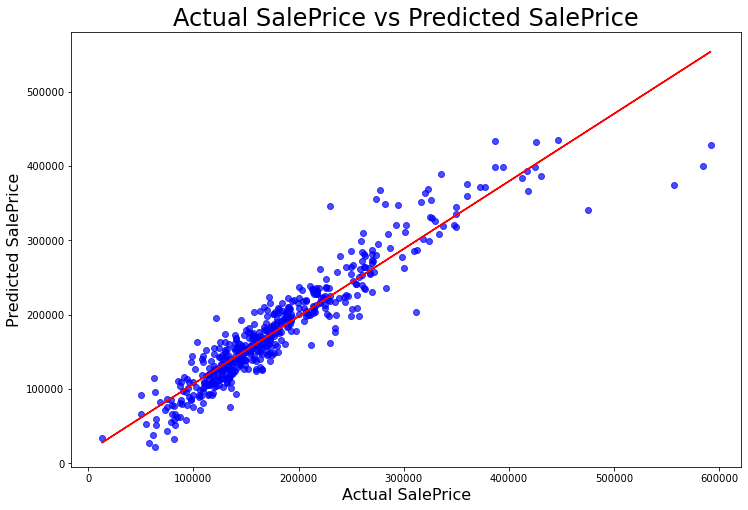

In [146]:
# Plotting line of best fit
# Create a figure.
plt.figure(figsize=(12,8))

# Generate a scatterplot of our data.
plt.scatter(y_holdout,
            Xholdout_hat,
            color = 'blue',
            alpha = 0.7)

# Also generate a line for our prediction.
plt.plot(y_holdout,
        bf,
        color = 'red')

# Create x label, y label and a title.
plt.xlabel('Actual SalePrice', fontsize = 16)
plt.ylabel('Predicted SalePrice', fontsize = 16)
plt.title('Actual SalePrice vs Predicted SalePrice', fontsize = 24);

As seen from the graph, the model performs very well at predicting prices between \\$10000 and \\$25000. The model tend to underestimate in predicting prices between \\$25000 and \\$45000 and overestimate in predicting prices from \\$50000 onwards.

## Business Recommendations

In [147]:
# Creating a dataframe with features and coefficients from ridge model
r_coef = pd.DataFrame({'Features': X_train_sc.columns, 'Coefficient': ridge_model.coef_})

In [148]:
# Sorting the data by coefficients in descending order
r_coef.sort_values(by = 'Coefficient', ascending = False)

,Features,Coefficient
15,Exter Qual,45288.074627
14,Kitchen Qual,27961.408393
1,Gr Liv Area,25174.893451
11,Neighborhood,22733.913972
0,Overall Qual,15148.443095
10,BsmtFin SF 1,9925.955401
2,Garage Area,6878.317071
16,Heating QC,6745.128638
3,Total Bsmt SF,6740.082528
17,Fireplace Qu,6687.013070


As observed from the coefficients from ridge model, the 5 features that add the most value to a home are 
1. Exter Qual: Exterior material quality
2. Kitchen Qual: Kitchen quality
3. Gr Liv Area: Above grade (ground) living area square feet
4. Neighborhood: Physical locations within Ames city limits
5. Overall Qual: Overall material and finish quality

The features that hurt the value of the home the most are
1. Age: Age of house
2. Full Bath: Full bathrooms above grade
3. TotRms AbvGrd: Total rooms above grade (does not include bathrooms)
4. Year Built: Original construction date
5. Bsmt Qual: Height of the basement

According to the model, in order to increase the value, homeowners are highly recommended to use excellent quality materials for the exterior, kitchen and in overall. At the same time, houses in Stone Brook, Northridge Heights, North Ridge and Veenker with large ground living area can fetch the best price.

Data shows that houses in Stone Brook, Northridge Heights, North Ridge and Veenker command the highest price in this city. Based on this information, with the highest potential to reach high price, these 4 neighborhoods are the most recommended for investment.

This model ranked 30+ in private and 50+ in public leaderboard on Kaggle. Scoring is based on the model's prediction performance on unseen data. The top and bottom 5 features, except 1, that affect the prediction the most are all general features of a house so I would say it should perform fairly well when generalizing to other cities. The one most important data I would need from another city to make a comparable model would be Neighborhood since that is the one feature that would be most different and it is the 4th feature that adds most value to a house in my model.